# Home.LLC

### Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.
### Use the S&P Case-Schiller Home Price Index as a proxy for home prices: https://fred.stlouisfed.org/series/CSUSHPISA


### The main key factors that influence US home prices nationally. We building a data science model that explains how these factors impacted home prices over the last 20 years.Using the S&P $Case-Schiller$ $Home$ $Price$ $Index$ as a proxy for home prices.

The S&P Case-Shiller U.S. Home Prices Index is influenced by various economic and demographic factors. Among the options you've listed, the main key factors that impact the S&P Case-Shiller U.S. Home Prices Index include:

1. Population In Thousands-Months (POPTHM): https://fred.stlouisfed.org/series/POPTHM
2. HOUSING STARTS In Thousands (HOUST): https://fred.stlouisfed.org/series/HOUST
3. MEDIAN SALES PRICE In Dollar (MSPUS): https://fred.stlouisfed.org/series/MSPUS
4. MORTGAGE RATE In Percent (MORTGAGE30US) : https://fred.stlouisfed.org/series/MORTGAGE30US
5. HOMEOWNERSHIP RATE In Percent (RSAHORUSQ1565): https://fred.stlouisfed.org/series/RHORUSQ156N
6. GDP (Gross Domestic Product) In Billions Of Dollers (GDP) : https://fred.stlouisfed.org/series/GDP
7. Unemployment Rate In Percent ((UNRATE)): https://fred.stlouisfed.org/series/UNRATE

#### These key factors play significant roles in influencing the S&P Case-Shiller U.S. Home Prices Index and are important considerations for understanding the dynamics of the housing market. 

In [213]:
# @title
%%graph
# digraph data_pipeline {
    size = "8!, 8!"
    graph [label = "Data Science Workflow for Forecasting and Regression" labelloc = top]

    Preprocessing -> Visualization -> "Model Building"

    "Model Building" -> "ARIMA (Autoregressive Integrated Moving Average)"
    "Model Building" -> "Seasonal ARIMA Forecast"
    "Model Building" -> "OLS Regression"

    "Visualization" -> "Line Plot"
    "Visualization" -> "Bar Plot"

    Preprocessing [label = "Data Preprocessing"]
    Visualization [label = "Data Visualization"]
    "Model Building" [label = "Model Development"]

    rank = same {"Line Plot" "Bar Plot"}
# }


IndentationError: unexpected indent (224304481.py, line 4)

In [70]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import mplcursors
# import os
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import datetime

In [2]:
np.set_printoptions(precision=0)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.precision', 3)

# A. Data Collect And Pre-process

## A.1.  US HOME PRICE INDEX(CSUSHPISA)

In [280]:
hm_pr=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\CSUSHPISA.csv") 
# hm_pr.head()

In [281]:
hm_pr.shape

(247, 2)

In [270]:
hm_pr.columns

Index(['DATE', 'CSUSHPISA'], dtype='object')

In [271]:
hm_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       247 non-null    object 
 1   CSUSHPISA  247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [272]:
hm_pr['DATE'] = pd.to_datetime(hm_pr['DATE'])

In [273]:
hm_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       247 non-null    datetime64[ns]
 1   CSUSHPISA  247 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [274]:
hm_pr.describe()

,CSUSHPISA
count,247.000
mean,184.069
std,45.326
min,128.461
25%,148.232
50%,173.828
75%,201.830
max,306.634


In [275]:
hm_pr.rename(columns={"CSUSHPISA":'US HOME PRICE INDEX'},inplace= True)
# hm_pr.set_index("DATE",inplace=True)
hm_pr.head()

,DATE,US HOME PRICE INDEX
0,2003-01-01,128.461
1,2003-02-01,129.355
2,2003-03-01,130.148
3,2003-04-01,130.884
4,2003-05-01,131.735


In [276]:
hm_pr.columns

Index(['DATE', 'US HOME PRICE INDEX'], dtype='object')

## A.2.  Population (POPTHM)
### Variations in $Population$ $Size$ can affect housing demand, which in turn influences home prices.

In [24]:
population=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\POPTHM.csv")
# population.head()

In [25]:
population.shape

(247, 2)

In [26]:
population.columns

Index(['DATE', 'POPTHM'], dtype='object')

In [36]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           247 non-null    object 
 1   POPULATION IN THOUSANDS MONTH  247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [37]:
population['DATE'] = pd.to_datetime(population['DATE'])

In [38]:
population.rename(columns={"POPTHM":'POPULATION IN THOUSANDS MONTH'},inplace= True)
# population.set_index("DATE",inplace=True)
population.head()

,DATE,POPULATION IN THOUSANDS MONTH
0,2003-01-01,"289,412.000"
1,2003-02-01,"289,606.000"
2,2003-03-01,"289,809.000"
3,2003-04-01,"290,024.000"
4,2003-05-01,"290,250.000"


## A.3. HOUSING STARTS (HOUST)
### The number of $New$ $Housing$ $Units$ start to build in every months serves as a key indicator of market supply trends, directly impacting home prices.


In [29]:
new_housing=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\HOUST.csv") 
# new_housing.head()

In [30]:
new_housing.shape

(247, 2)

In [31]:
new_housing.columns

Index(['DATE', 'HOUST'], dtype='object')

In [39]:
new_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            247 non-null    object 
 1   HOUSING STARTS  247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [40]:
new_housing['DATE'] = pd.to_datetime(new_housing['DATE'])

In [41]:
new_housing.rename(columns={'HOUST':'HOUSING STARTS'},inplace=True)
# new_housing.set_index("DATE",inplace=True)
new_housing.head()

,DATE,HOUSING STARTS
0,2003-01-01,"1,853.000"
1,2003-02-01,"1,629.000"
2,2003-03-01,"1,726.000"
3,2003-04-01,"1,643.000"
4,2003-05-01,"1,751.000"


## A.4. MEDIAN SALES PRICE (MSPUS)
### The $Median$ $Sales$ $Price$ reflects shifts in home prices and serves as a key indicator of housing market conditions.

In [84]:
median_sl_pr_sld=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\MSPUS.csv")
# median_sl_pr_sld.head()

In [85]:
median_sl_pr_sld.shape

(83, 2)

In [86]:
median_sl_pr_sld.columns

Index(['observation_date', 'MSPUS'], dtype='object')

In [87]:
median_sl_pr_sld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  83 non-null     object
 1   MSPUS             83 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [88]:
median_sl_pr_sld.columns

Index(['observation_date', 'MSPUS'], dtype='object')

In [90]:
median_sl_pr_sld['DATE'] = pd.to_datetime(median_sl_pr_sld['observation_date'])

In [91]:
median_sl_pr_sld['DATE'] = pd.to_datetime(median_sl_pr_sld['DATE'])
median_sl_pr_sld.set_index('DATE', inplace=True)
median_sl_pr_sld = median_sl_pr_sld.resample('MS').ffill()

In [92]:
median_sl_pr_sld.shape

(247, 2)

In [93]:
median_sl_pr_sld.columns

Index(['observation_date', 'MSPUS'], dtype='object')

In [95]:
median_sl_pr_sld.rename(columns={'MSPUS':'MEDIAN SALES PRICE'},inplace=True)
median_sl_pr_sld.rename(columns={'observation_date':'DATE'},inplace=True)
# median_sl_pr_sld.head()

In [96]:
median_sl_pr_sld.columns

Index(['DATE', 'MEDIAN SALES PRICE'], dtype='object')

In [244]:
median_sl_pr_sld = median_sl_pr_sld.drop(columns=['DATE'])

In [245]:
median_sl_pr_sld.columns

Index(['MEDIAN SALES PRICE'], dtype='object')

In [246]:
median_sl_pr_sld.reset_index(inplace=True)
median_sl_pr_sld.rename(columns={'index': 'DATE'}, inplace=True)

In [247]:
median_sl_pr_sld

,DATE,MEDIAN SALES PRICE
0,2003-01-01,186000
1,2003-02-01,186000
2,2003-03-01,186000
3,2003-04-01,191800
4,2003-05-01,191800
...,...,...
242,2023-03-01,429000
243,2023-04-01,418500
244,2023-05-01,418500
245,2023-06-01,418500


# Available only at the beginning of every quarter: $January$, $April$, $July$, and $October$.
# Hence we assume that $Jan$ price are applicable for $Feb$ and $March$ and so on for other following quarters.

## A.5. HOMEOWNERSHIP RATE (RSAHORUSQ1565)
### Fluctuations in the $Homeownership$ $Rate$ affect the supply-demand dynamics of the housing market, influencing home prices.


In [165]:
hm_ownership=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\RHORUSQ156N.csv")
# hm_ownership.head()

In [166]:
hm_ownership.shape

(83, 2)

In [167]:
hm_ownership.columns

Index(['DATE', 'RHORUSQ156N'], dtype='object')

In [168]:
hm_ownership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         83 non-null     object 
 1   RHORUSQ156N  83 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [169]:
hm_ownership['DATE'] = pd.to_datetime(hm_ownership['DATE'])

In [170]:
hm_ownership.columns

Index(['DATE', 'RHORUSQ156N'], dtype='object')

In [171]:
hm_ownership['DATE'] = pd.to_datetime(hm_ownership['DATE'])
hm_ownership.set_index('DATE', inplace=True)
hm_ownership = hm_ownership.resample('MS').ffill()

In [172]:
hm_ownership.columns

Index(['RHORUSQ156N'], dtype='object')

In [173]:
hm_ownership.rename(columns={'RHORUSQ156N':'HOMEOWNERSHIP RATE'},inplace=True)
# hm_ownership.set_index("DATE",inplace=True)
# hm_ownership

In [174]:
hm_ownership.reset_index(inplace=True)
hm_ownership.rename(columns={'index': 'DATE'}, inplace=True)

In [175]:
hm_ownership

,DATE,HOMEOWNERSHIP RATE
0,2003-01-01,68.000
1,2003-02-01,68.000
2,2003-03-01,68.000
3,2003-04-01,68.000
4,2003-05-01,68.000
...,...,...
242,2023-03-01,66.000
243,2023-04-01,65.900
244,2023-05-01,65.900
245,2023-06-01,65.900


# Available only at the beginning of every quarter: $January$, $April$, $July$, and $October$.
# Hence we assume that $Jan$ HOMEOWNERSHIP RATE are applicable for $Feb$ and $March$ and so on for other following quarters.

## A.6.  MORTGAGE RATE(MORTGAGE30US)
### Variations in $Mortgage$ $Rates$ impact housing affordability, driving changes in demand and influencing home prices.

In [202]:
mortgage=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\MORTGAGE30US.csv")
# mortgage.head()

In [203]:
mortgage.shape

(247, 2)

In [204]:
mortgage.columns

Index(['DATE', 'MORTGAGE30US'], dtype='object')

In [205]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          247 non-null    object 
 1   MORTGAGE30US  247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [206]:
mortgage['DATE'] = pd.to_datetime(mortgage['DATE'])

In [207]:
mortgage.rename(columns={'MORTGAGE30US':'MORTGAGE RATE'},inplace=True)
# mortgage.set_index("DATE",inplace=True)
# mortgage.head()

In [208]:
mortgage

,DATE,MORTGAGE RATE
0,2003-01-01,5.916
1,2003-02-01,5.843
2,2003-03-01,5.745
3,2003-04-01,5.812
4,2003-05-01,5.484
...,...,...
242,2023-03-01,6.544
243,2023-04-01,6.343
244,2023-05-01,6.425
245,2023-06-01,6.714


# A.7. GDP (Gross-Domestic-Product)
### Changes in $GDP$ impact economic stability, which can influence consumer confidence, income levels, and ultimately, the demand for housing, thereby affecting home prices.



In [211]:
gdp=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\GDP.csv")
# gdp.head()

In [212]:
gdp.shape

(83, 2)

In [213]:
gdp.columns

Index(['DATE', 'GDP'], dtype='object')

In [214]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    83 non-null     object 
 1   GDP     83 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [216]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp.set_index('DATE', inplace=True)
gdp = gdp.resample('MS').ffill()

In [217]:
gdp.reset_index(inplace=True)
gdp.rename(columns={'index': 'DATE'}, inplace=True)

In [218]:
gdp

,DATE,GDP
0,2003-01-01,"11,174.129"
1,2003-02-01,"11,174.129"
2,2003-03-01,"11,174.129"
3,2003-04-01,"11,312.766"
4,2003-05-01,"11,312.766"
...,...,...
242,2023-03-01,"26,813.601"
243,2023-04-01,"27,063.012"
244,2023-05-01,"27,063.012"
245,2023-06-01,"27,063.012"


# Available only at the beginning of every quarter: $January$, $April$, $July$, and $October$.
# Hence we assume that $Jan$ GDP are applicable for $Feb$ and $March$ and so on for other following quarters.

# A.8. Unemployment Rate(UNRATE)
### Changes in the $Unemployment$ $Rate$ influence income stability and employment prospects, which in turn can alter housing demand and affect home prices.

In [220]:
unemployee=pd.read_csv(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Renamed Data\UNRATE.csv")
# unemployee.head()

In [221]:
unemployee.shape

(247, 2)

In [222]:
unemployee.columns

Index(['DATE', 'UNRATE'], dtype='object')

In [223]:
unemployee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    247 non-null    object 
 1   UNRATE  247 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [224]:
unemployee['DATE'] = pd.to_datetime(unemployee['DATE'])

In [227]:
unemployee.rename(columns={'UNRATE':'UNEMPLOYEE RATE'},inplace=True)
unemployee.set_index("DATE",inplace=True)
# unemployee.head()

In [228]:
unemployee.reset_index(inplace=True)
unemployee.rename(columns={'index': 'DATE'}, inplace=True)
unemployee

,DATE,UNEMPLOYEE RATE
0,2003-01-01,5.800
1,2003-02-01,5.900
2,2003-03-01,5.900
3,2003-04-01,6.000
4,2003-05-01,6.100
...,...,...
242,2023-03-01,3.500
243,2023-04-01,3.400
244,2023-05-01,3.700
245,2023-06-01,3.600


In [249]:
dataframes = [population, new_housing, median_sl_pr_sld, hm_ownership, mortgage, gdp, unemployee, hm_pr]

merged_df_1 = dataframes[0]
for df in dataframes[1:]:
    merged_df_1 = pd.merge(merged_df_1, df, on="DATE", how="outer")

print(f"Shape of merged DataFrame: {merged_df_1.shape}")
# print(merged_df_1.head())

Shape of merged DataFrame: (247, 9)


In [252]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           247 non-null    datetime64[ns]
 1   POPULATION IN THOUSANDS MONTH  247 non-null    float64       
 2   HOUSING STARTS                 247 non-null    float64       
 3   MEDIAN SALES PRICE             247 non-null    int64         
 4   HOMEOWNERSHIP RATE             247 non-null    float64       
 5   MORTGAGE RATE                  247 non-null    float64       
 6   GDP                            247 non-null    float64       
 7   UNEMPLOYEE RATE                247 non-null    float64       
 8   US HOME PRICE INDEX            247 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 19.3 KB


In [250]:
merged_df_1

,DATE,POPULATION IN THOUSANDS MONTH,HOUSING STARTS,MEDIAN SALES PRICE,HOMEOWNERSHIP RATE,MORTGAGE RATE,GDP,UNEMPLOYEE RATE,US HOME PRICE INDEX
0,2003-01-01,"289,412.000","1,853.000",186000,68.000,5.916,"11,174.129",5.800,128.461
1,2003-02-01,"289,606.000","1,629.000",186000,68.000,5.843,"11,174.129",5.900,129.355
2,2003-03-01,"289,809.000","1,726.000",186000,68.000,5.745,"11,174.129",5.900,130.148
3,2003-04-01,"290,024.000","1,643.000",191800,68.000,5.812,"11,312.766",6.000,130.884
4,2003-05-01,"290,250.000","1,751.000",191800,68.000,5.484,"11,312.766",6.100,131.735
...,...,...,...,...,...,...,...,...,...
242,2023-03-01,"334,753.000","1,380.000",429000,66.000,6.544,"26,813.601",3.500,298.539
243,2023-04-01,"334,880.000","1,348.000",418500,65.900,6.343,"27,063.012",3.400,300.198
244,2023-05-01,"335,013.000","1,583.000",418500,65.900,6.425,"27,063.012",3.700,302.620
245,2023-06-01,"335,163.000","1,418.000",418500,65.900,6.714,"27,063.012",3.600,304.651


In [251]:
merged_df_1.describe()

,POPULATION IN THOUSANDS MONTH,HOUSING STARTS,MEDIAN SALES PRICE,HOMEOWNERSHIP RATE,MORTGAGE RATE,GDP,UNEMPLOYEE RATE,US HOME PRICE INDEX
count,247.000,247.000,247.000,247.000,247.000,247.000,247.000,247.000
mean,"315,387.150","1,253.632","281,014.170",66.194,4.734,"17,536.723",5.942,184.069
std,"13,928.174",455.087,"65,040.133",1.815,1.136,"4,091.443",2.047,45.326
min,"289,412.000",478.000,"186,000.000",62.900,2.684,"11,174.129",3.400,128.461
25%,"303,600.500",924.000,"228,100.000",64.800,3.822,"14,448.882",4.450,148.232
50%,"316,535.000","1,224.000","264,800.000",65.900,4.490,"16,728.687",5.400,173.828
75%,"328,606.500","1,571.000","318,400.000",67.900,5.825,"20,328.553",7.250,201.830
max,"335,329.000","2,273.000","442,600.000",69.200,6.900,"27,623.543",14.700,306.634


# B. Visualization And Business Insights

In [283]:
print(type(hm_pr))

<class 'pandas.core.frame.DataFrame'>


In [286]:
median_value = merged_df_1['US HOME PRICE INDEX'].median()
print(median_value)

173.828


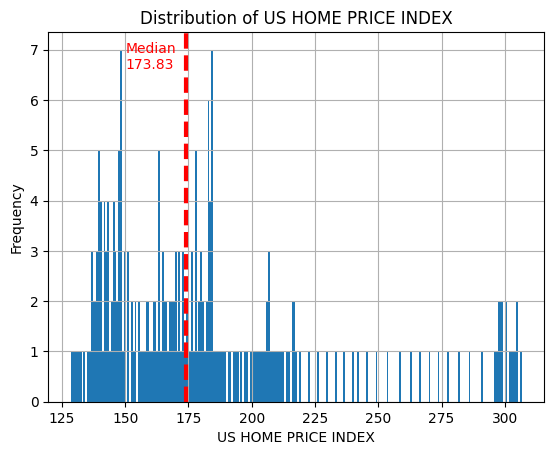

In [222]:
hm_pr_column = merged_df_1['US HOME PRICE INDEX'] 
median_value = merged_df_1['US HOME PRICE INDEX'].median()
plt.hist(hm_pr_column, bins = 247)
plt.xlabel("US HOME PRICE INDEX")
plt.ylabel("Frequency")
plt.axvline(x=median_value, color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{median_value:.2f}", x=150, y=plt.gca().get_ylim()[1] * 0.9, size=10, color='red')
plt.title("Distribution of US HOME PRICE INDEX")
plt.grid(True)
plt.show()

Text(148.07999999999998, 1.3, 'US HOME PRICE INDEX : \n Mean 184.07, sd 45.33 \n sample size 247 ')

<Figure size 640x480 with 0 Axes>

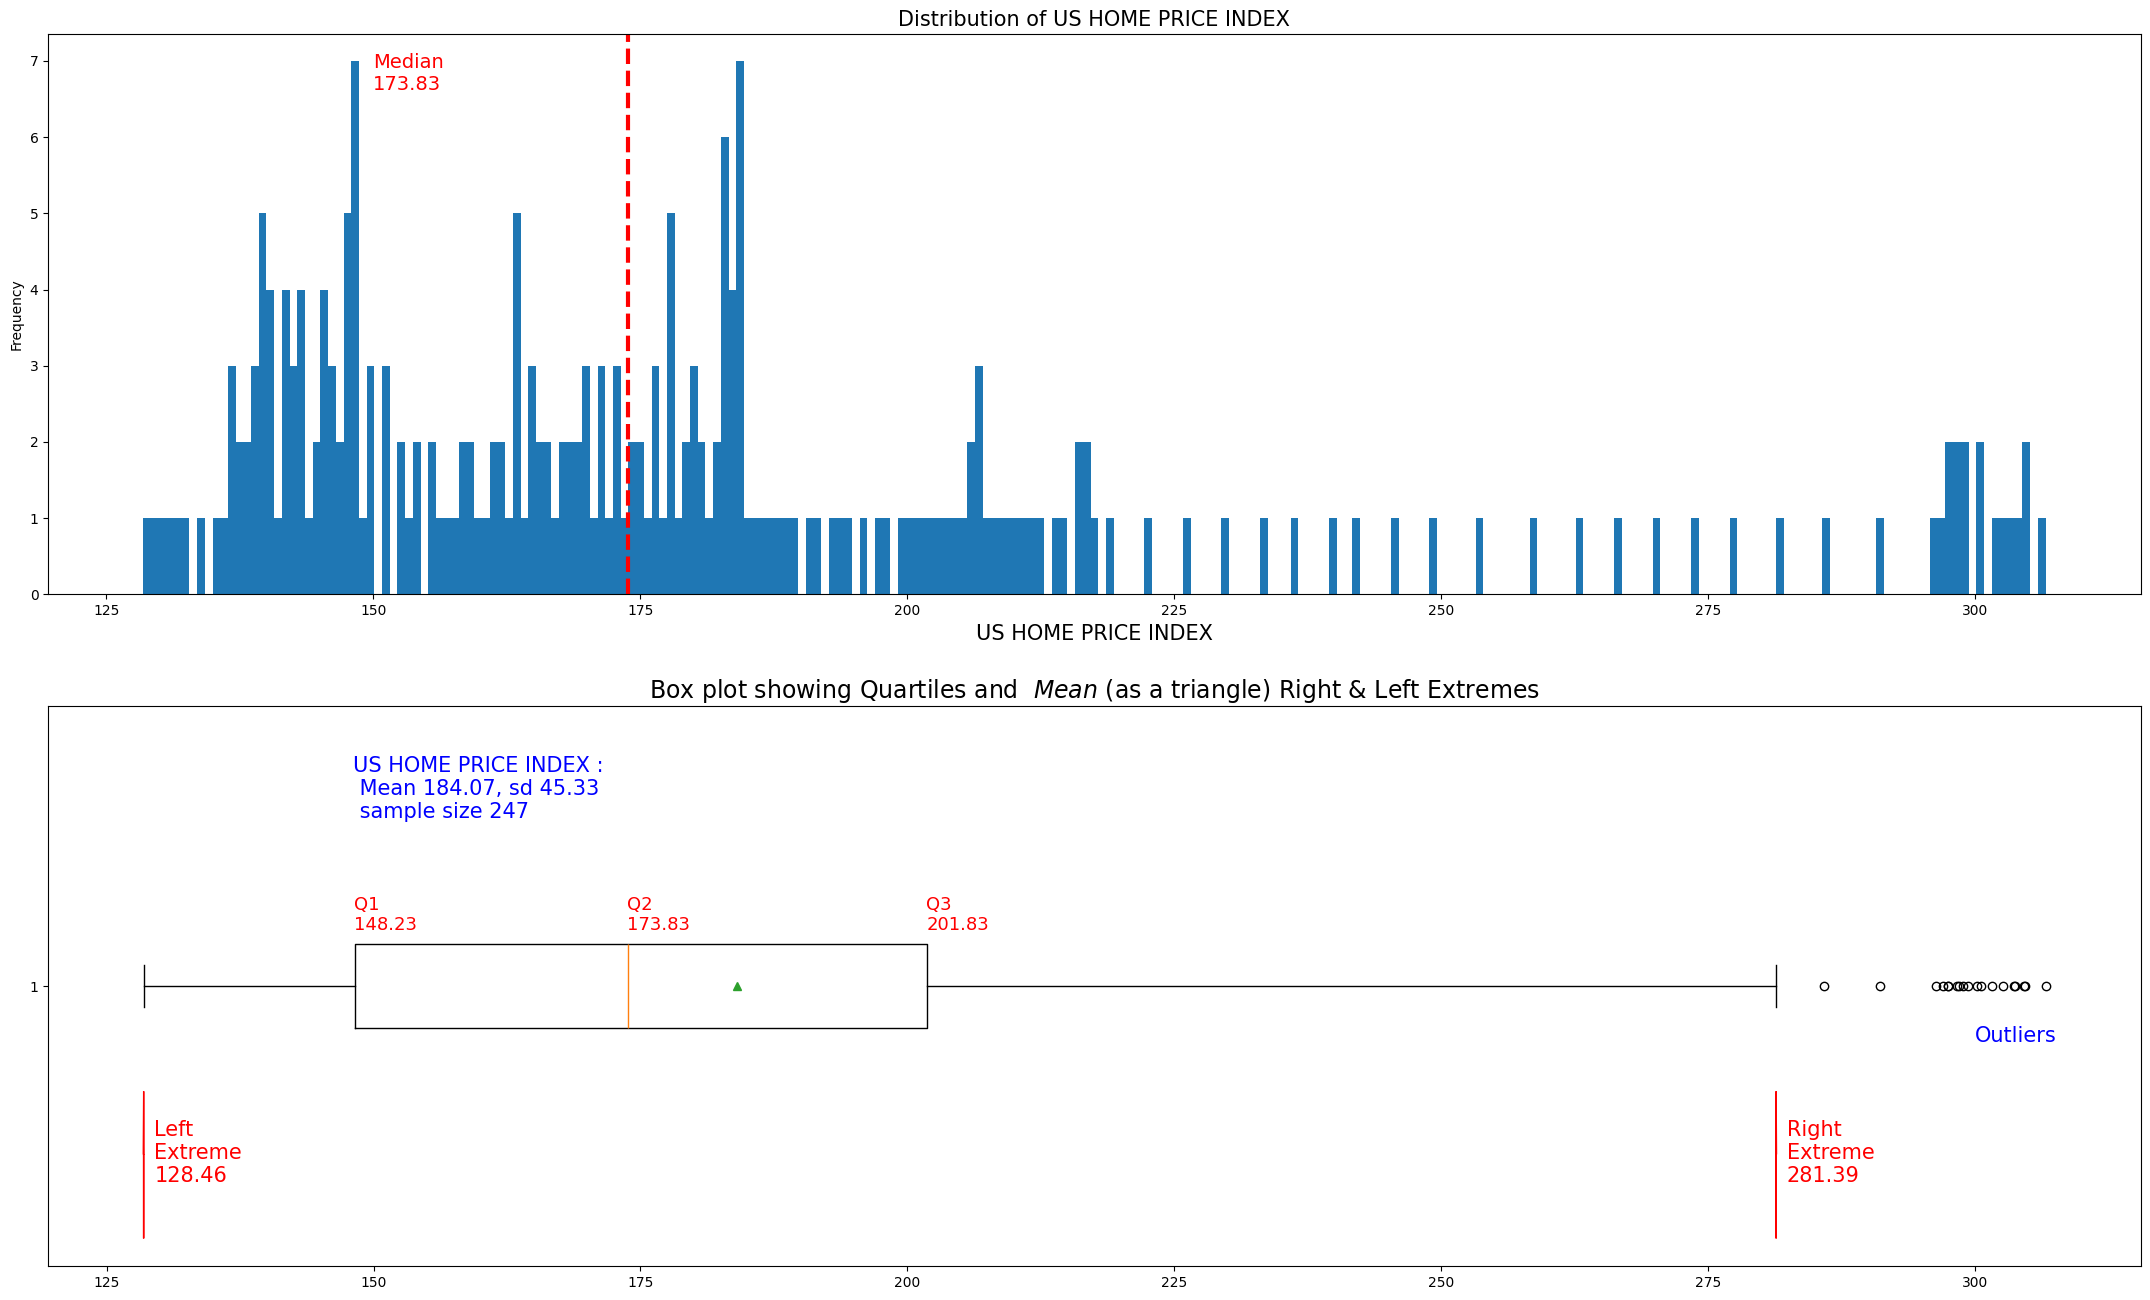

In [224]:
plt.subplots_adjust(hspace = 5.0) 
plt.figure(figsize=(27, 16))
plt.subplot(2,1, 1)
hm_pr_column = merged_df_1['US HOME PRICE INDEX']
median_value = merged_df_1['US HOME PRICE INDEX'].median()
plt.hist(merged_df_1['US HOME PRICE INDEX'], bins = 247)
plt.xlabel("US HOME PRICE INDEX",size = 15)
plt.ylabel("Frequency")
plt.axvline(x=median_value, color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{median_value:.2f}", x=150, y=plt.gca().get_ylim()[1] * 0.9, size=14, color='red')
plt.title("Distribution of US HOME PRICE INDEX",size = 15)


plt.subplot(2,1, 2)
Q1, Q2, Q3 = np.quantile(merged_df_1['US HOME PRICE INDEX'] , [.25, .5, .75] ).round(2)
# W1 = (Q1 - 1.5*(Q3-Q1)).round(2)
# W2 = (Q3 + 1.5*(Q3-Q1)).round(2)

# Create the boxplot and extract key data
boxplot = plt.boxplot(merged_df_1['US HOME PRICE INDEX'] , vert=False, showmeans=True, manage_ticks = True)


box_data = boxplot['whiskers']  

left_extreme = box_data[0].get_xdata()[1]  
right_extreme = box_data[1].get_xdata()[1]  # Extract right extreme
x_adj = 0.05  # Adjustment factor for improving display

# plt.text(s=f'Left_Whisker \n{W1}', x=W1 - 3 * x_adj, y=1.12, color='red', size=12)
# plt.text(s=f'Right_Whisker \n{W2}', x=W2 - 5 * x_adj, y=1.1, color='red', size=12)
# plt.text(s=f'Right_Whisker \n{W2}', x=W2 - 5 * x_adj, y=1.12, color='red', size=12)
plt.text(s=f'Q1 \n{Q1}', x=Q1 - x_adj, y=1.1, color='red', size=13)
plt.text(s=f'Q2 \n{Q2}', x=Q2 - x_adj, y=1.1, color='red', size=13)
# plt.text(s=f'Q2 \n{Q2}', x=187, y=1.1, color='red', size=9)
plt.text(s=f'Q3 \n{Q3}', x=Q3 - x_adj, y=1.1, color='red', size=13)
# plt.text(s=f'<-----IQR---->', x= Q1, y = .8, color = 'blue', size = 12  )
# plt.text(s='Outlier', x=left_extreme-1, y=0.9, color='blue', size=10)
plt.text(s='Outliers', x=300, y=0.9, color='blue', size=15)

plt.arrow(left_extreme, 0.55, 0,  0.15, color = 'red', width = 0.025)
# plt.text(s=f'Left \nExtreme\n{left_extreme:.2f}', x=left_extreme - 3 * x_adj, y=0.75, color='blue', size=12)
plt.text(s=f'Left \nExtreme\n{left_extreme:.2f}', x=left_extreme+1, y=0.65, color='red', size=15)
plt.arrow(right_extreme, 0.55, 0,  0.15, color = 'red', width = 0.025)
plt.text(s=f'Right \nExtreme\n{right_extreme:.2f}', x=right_extreme+1, y=0.65, color='red', size=15)
plt.title("Box plot showing Quartiles and  $Mean$ (as a triangle) Right & Left Extremes",size = 17)
plt.text(s=f"US HOME PRICE INDEX : \n Mean {round(merged_df_1['US HOME PRICE INDEX'].mean(), 2)}, sd {round(merged_df_1['US HOME PRICE INDEX'].std(), 2)} \n sample size 247 ", 
         color='blue', size=15, x=Q1 - 0.15, y=1.3)

In [229]:
hm_pr_column = merged_df_1['US HOME PRICE INDEX']
Q1 = np.quantile(hm_pr_column, 0.25)
Q3 = np.quantile(hm_pr_column, 0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hm_pr_column[(hm_pr_column < lower_bound) | (hm_pr_column > upper_bound)]
outliers_home_price_index = pd.DataFrame({'Outliers': outliers})

if not outliers_home_price_index.empty:
    print(f"Outliers count: {outliers_home_price_index.shape[0]}")
#     print("Outliers detected:")
#     print(outliers_home_price_index)
else:
    print("No outliers detected.")

Outliers count: 19


In [232]:
outliers_home_price_index.T

,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246
Outliers,285.921,291.09,296.353,300.55,303.796,304.755,303.714,301.596,299.38,298.922,298.312,297.471,297.025,297.464,298.539,300.198,302.62,304.651,306.634


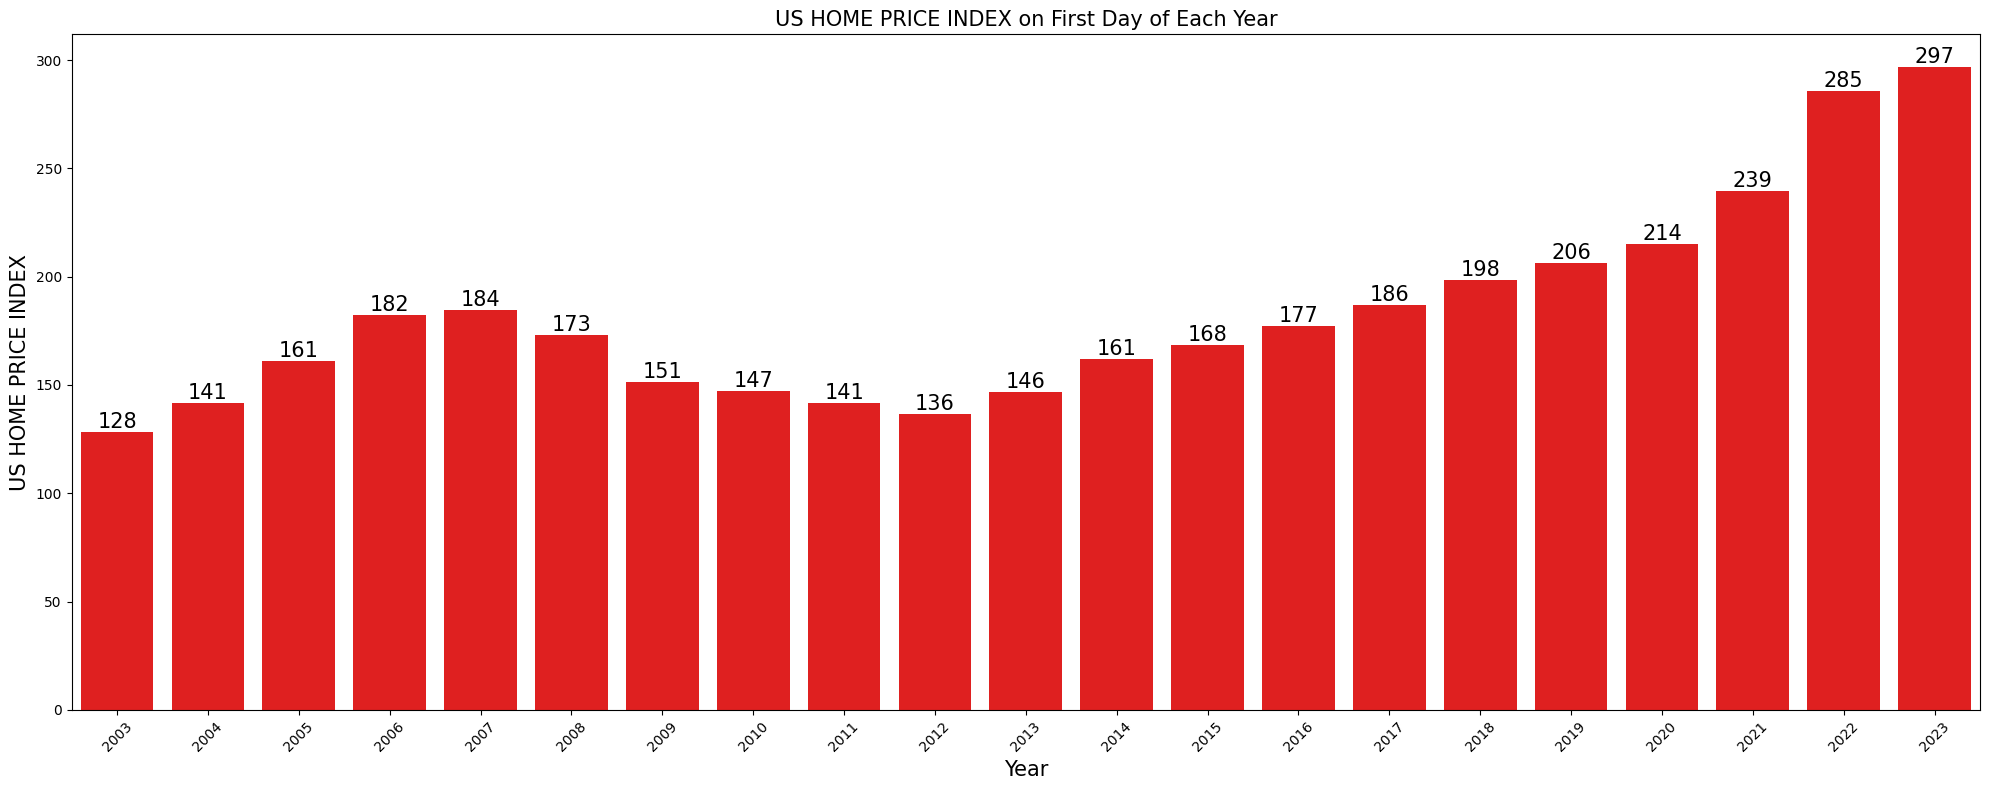

In [291]:
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'], errors='coerce')
first_day_of_year = merged_df_1.groupby(merged_df_1['DATE'].dt.year).first()

plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x=first_day_of_year.index, 
    y='US HOME PRICE INDEX',
    data=first_day_of_year,
    color='red'
)

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )
plt.xlabel('Year', size=15)
plt.ylabel('US HOME PRICE INDEX', size=15)
plt.title('US HOME PRICE INDEX on First Day of Each Year', size=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

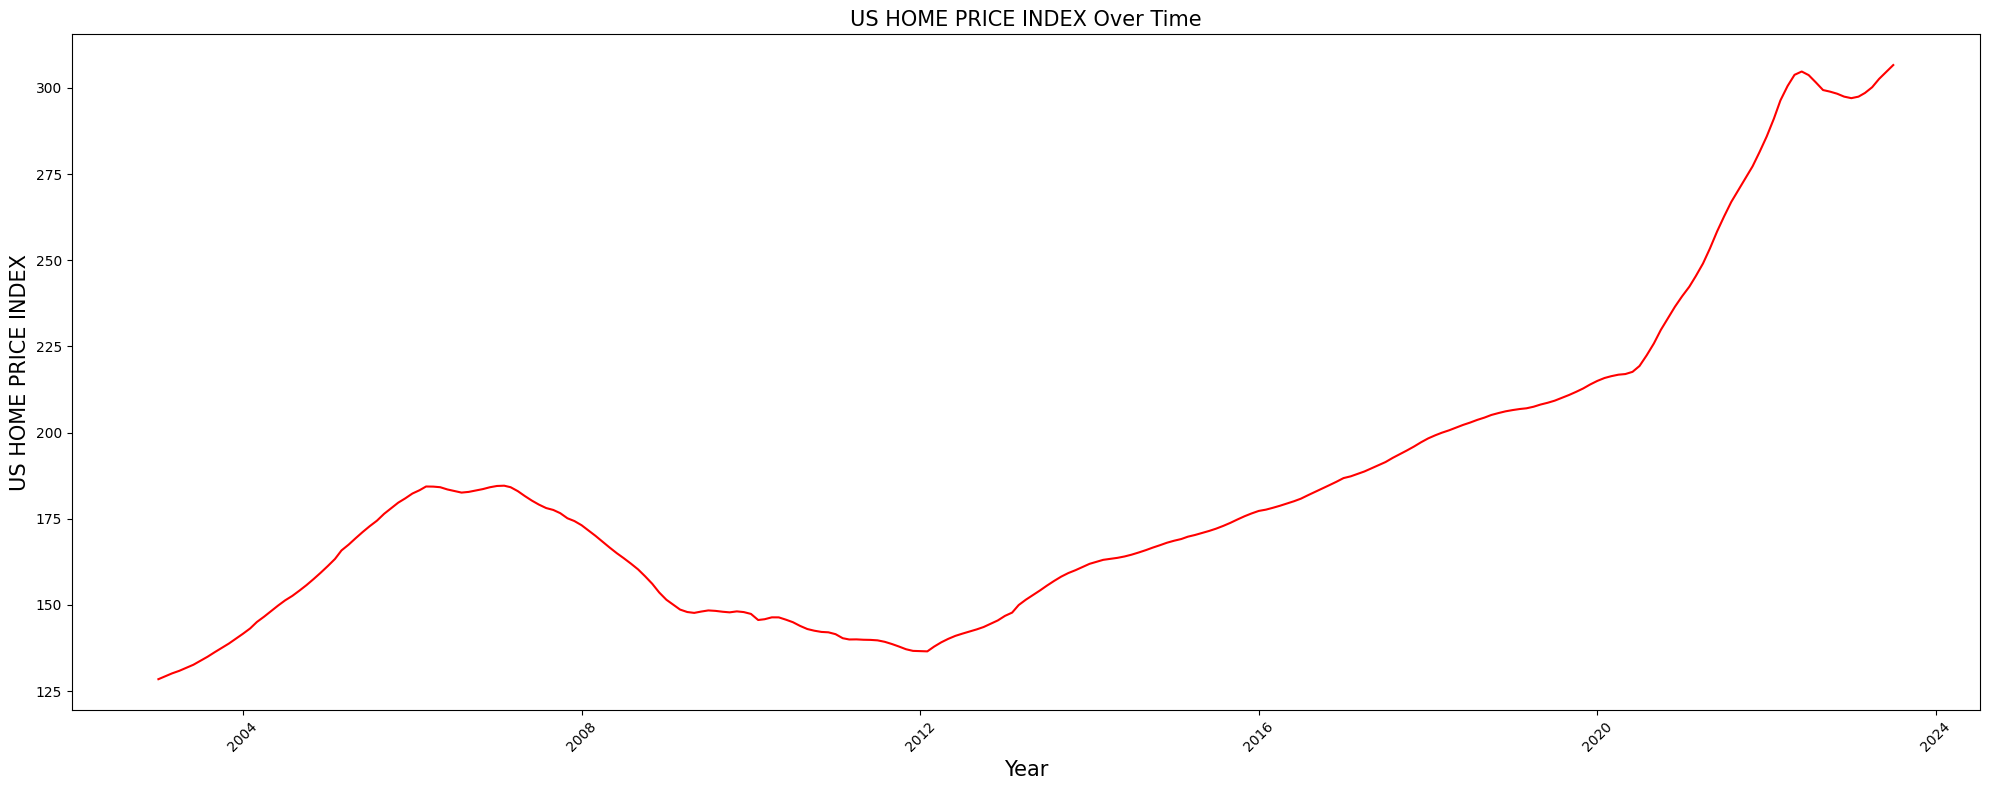

In [300]:
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'], errors='coerce')

plt.figure(figsize=(20, 8))
plt.plot(merged_df_1['DATE'], merged_df_1['US HOME PRICE INDEX'], 'r')
plt.xlabel('Year', size=15)
plt.ylabel('US HOME PRICE INDEX', size=15)
plt.title('US HOME PRICE INDEX Over Time', size=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

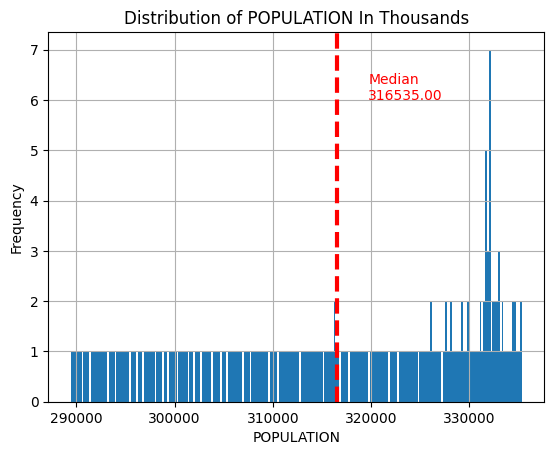

In [217]:
plt.hist(merged_df_1['POPULATION IN THOUSANDS MONTH'], bins=247)
plt.xlabel("POPULATION")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['POPULATION IN THOUSANDS MONTH'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['POPULATION IN THOUSANDS MONTH'].median():.2f}", 
         x=1.01 * merged_df_1['POPULATION IN THOUSANDS MONTH'].median(), 
         y=6, 
         size=10, 
         color='red')
plt.title("Distribution of POPULATION In Thousands")
plt.grid(True)
plt.show()

In [219]:
Population_Score = merged_df_1['POPULATION IN THOUSANDS MONTH']
Population_skewness = skew(Population_Score)
print(f"Skewness of POPULATION: {round(Population_skewness, 2)}")

Skewness of POPULATION: -0.26


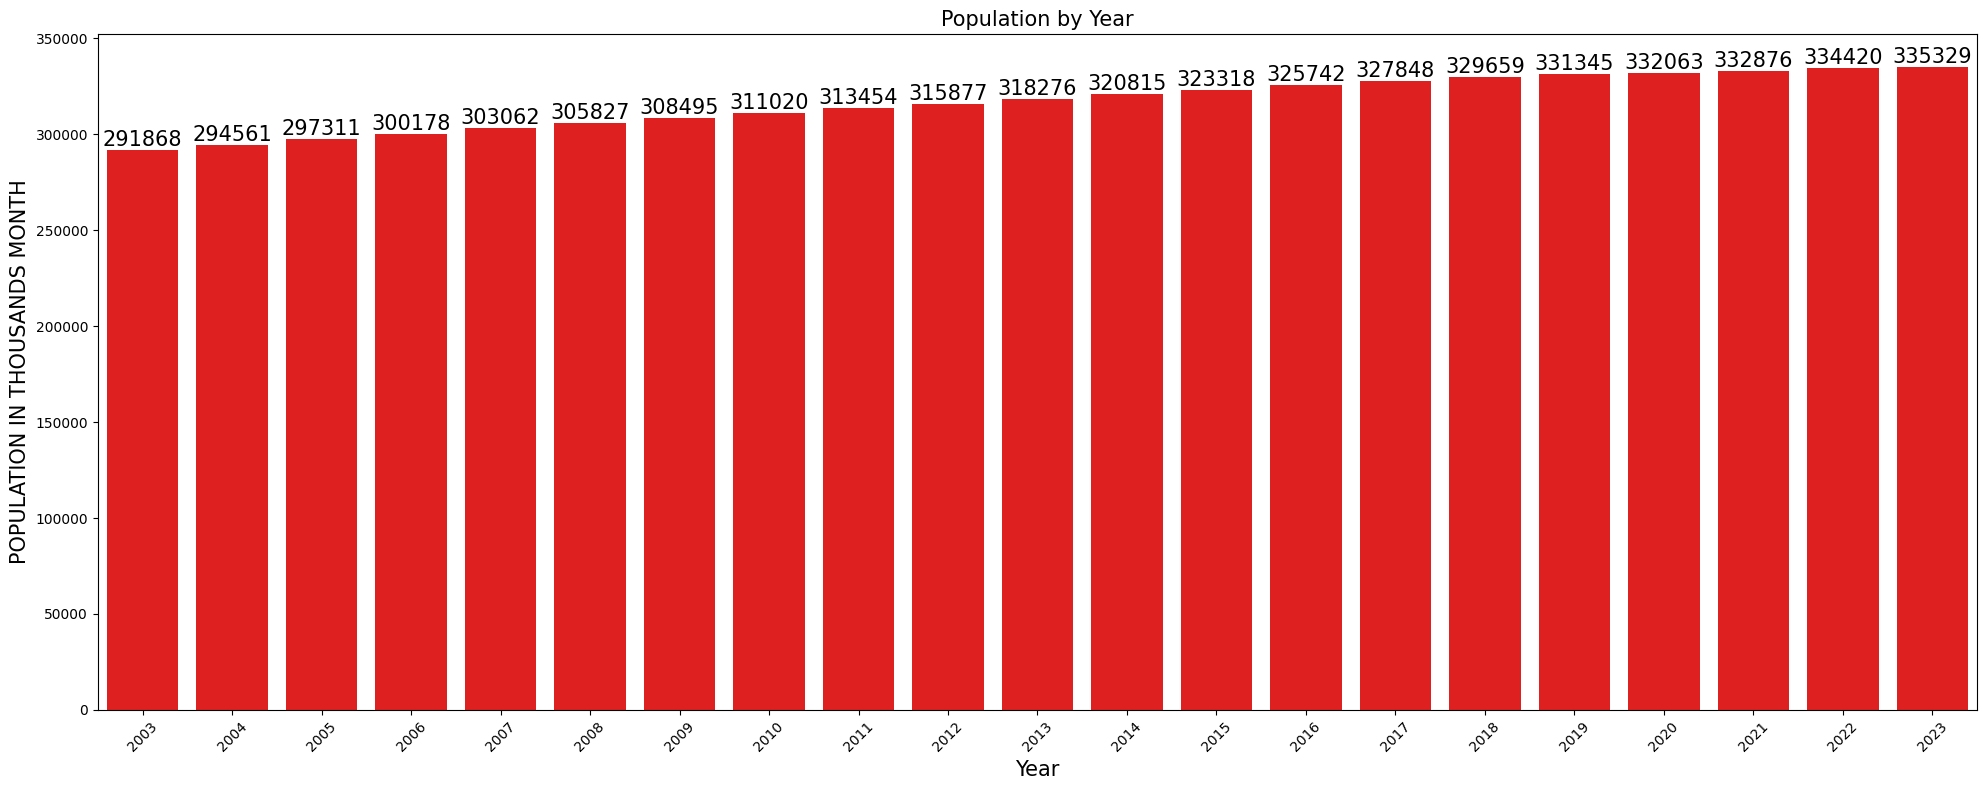

In [306]:
merged_df_1['Year'] = merged_df_1['DATE'].dt.year
yearly_population = merged_df_1.groupby('Year')['POPULATION IN THOUSANDS MONTH'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x='Year', 
    y='POPULATION IN THOUSANDS MONTH', 
    data=yearly_population, 
    color='red'
)

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size = 15)
plt.ylabel('POPULATION IN THOUSANDS MONTH', size = 15)
plt.title('Population by Year', size = 15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

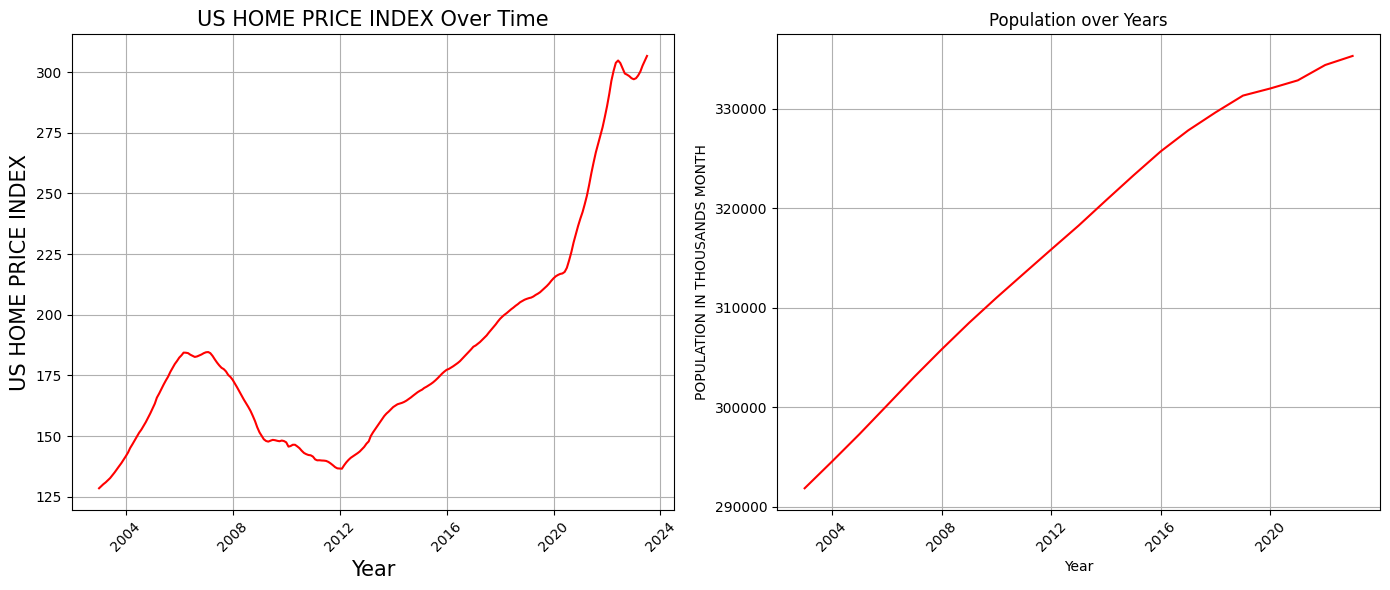

In [309]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'], errors='coerce')
plt.plot(merged_df_1['DATE'], merged_df_1['US HOME PRICE INDEX'], 'r')
plt.xlabel('Year', size=15)
plt.ylabel('US HOME PRICE INDEX', size=15)
plt.title('US HOME PRICE INDEX Over Time', size=15)
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(yearly_population['Year'], yearly_population['POPULATION IN THOUSANDS MONTH'],'r')
plt.xlabel('Year')
plt.ylabel('POPULATION IN THOUSANDS MONTH')
plt.title('Population over Years')
year_ticks = range(2004, yearly_population['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Population Monotonic increase , US HOME PRICE INDEX Non-Monotonic 

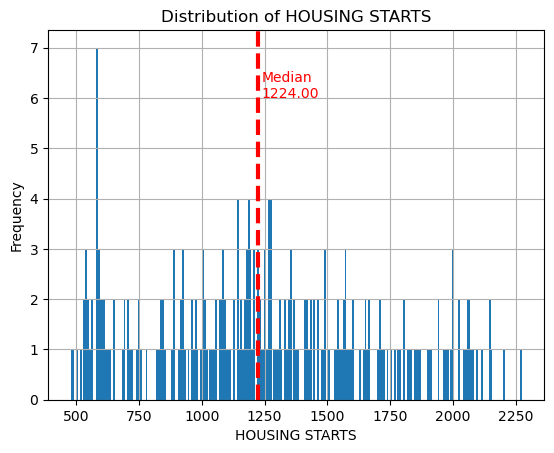

In [102]:
plt.hist(merged_df_1['HOUSING STARTS'], bins=247)
plt.xlabel("HOUSING STARTS")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['HOUSING STARTS'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['HOUSING STARTS'].median():.2f}", 
         x=1.01 * merged_df_1['HOUSING STARTS'].median(), 
         y=6, 
         size=10, 
         color='red')
plt.title("Distribution of HOUSING STARTS")
plt.grid(True)
plt.show()

In [88]:
HOUSING_STARTS_Score = merged_df_1['HOUSING STARTS']
HOUSING_STARTS_skewness = skew(HOUSING_STARTS_Score)
print(f"Skewness of HOUSING STARTS: {round(HOUSING_STARTS_skewness, 2)}")

Skewness of HOUSING STARTS: 0.2


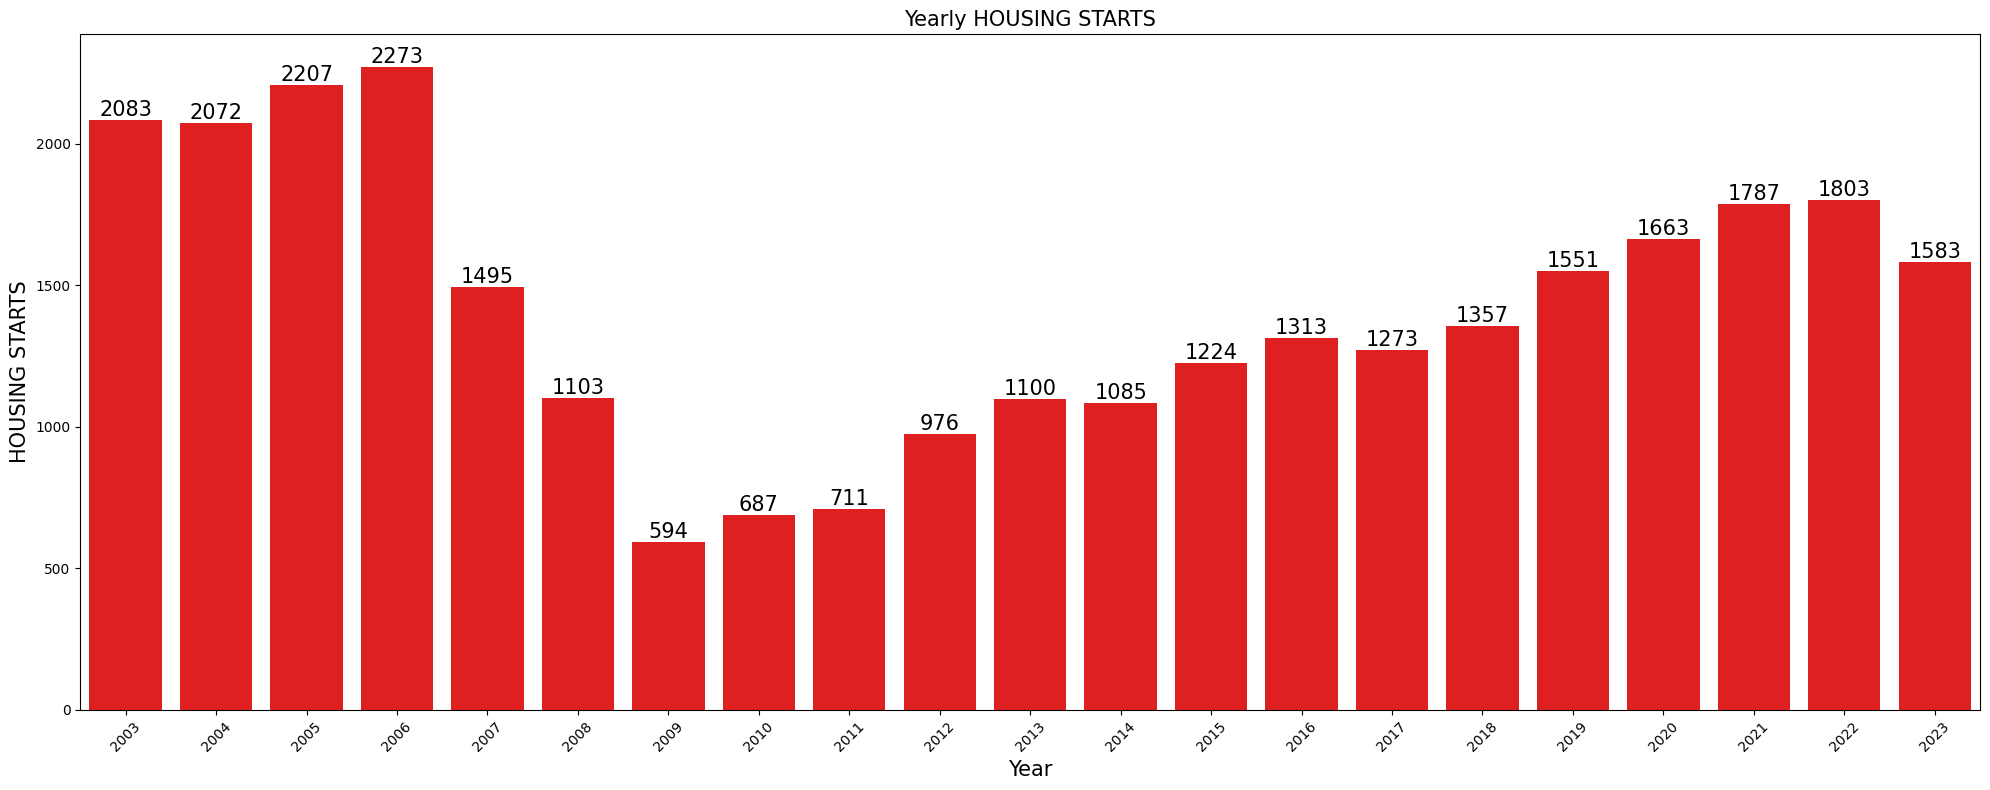

In [310]:
merged_df_1['Year'] = merged_df_1['DATE'].dt.year
yearly_HOUSING_STARTS = merged_df_1.groupby('Year')['HOUSING STARTS'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x='Year', 
    y='HOUSING STARTS', 
    data=yearly_HOUSING_STARTS, 
    color='red'
)

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size = 15)
plt.ylabel('HOUSING STARTS', size = 15)
plt.title('Yearly HOUSING STARTS', size = 15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

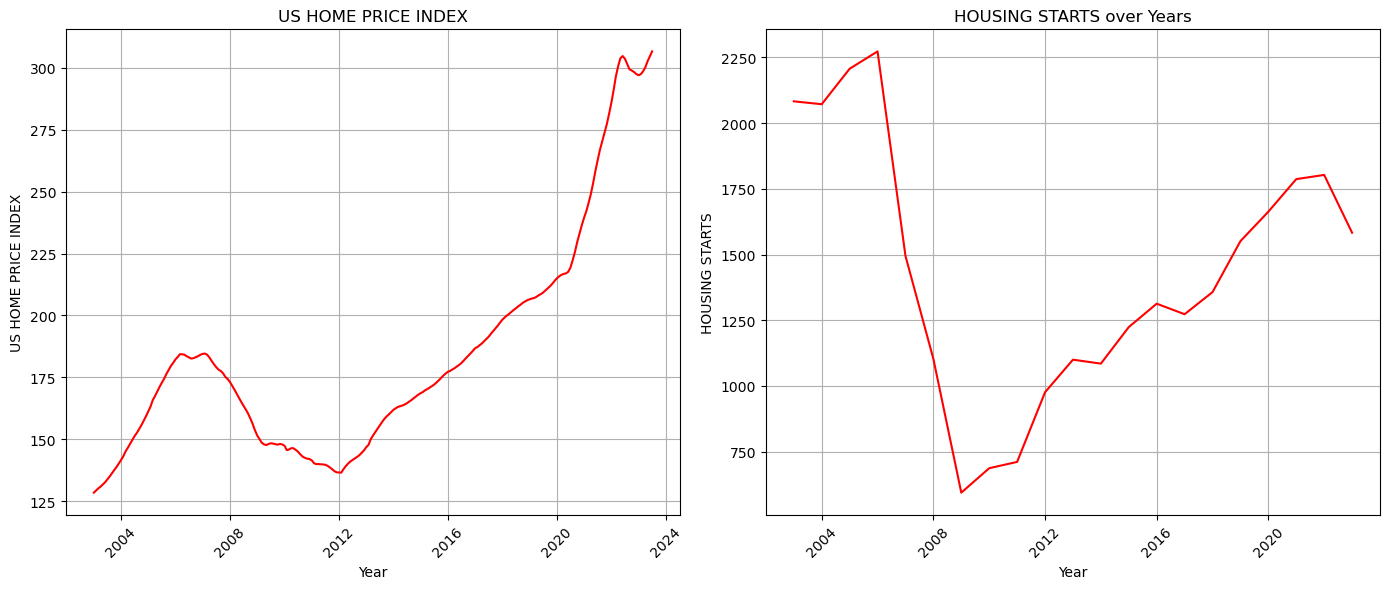

In [119]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hm_pr['US HOME PRICE INDEX'],'r')
plt.title('US HOME PRICE INDEX')
plt.xlabel('Year')
plt.ylabel('US HOME PRICE INDEX')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(yearly_HOUSING_STARTS['Year'], yearly_HOUSING_STARTS['HOUSING STARTS'],'r')
plt.xlabel('Year')
plt.ylabel('HOUSING STARTS')
plt.title('HOUSING STARTS over Years')
year_ticks = range(2004, yearly_HOUSING_STARTS['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

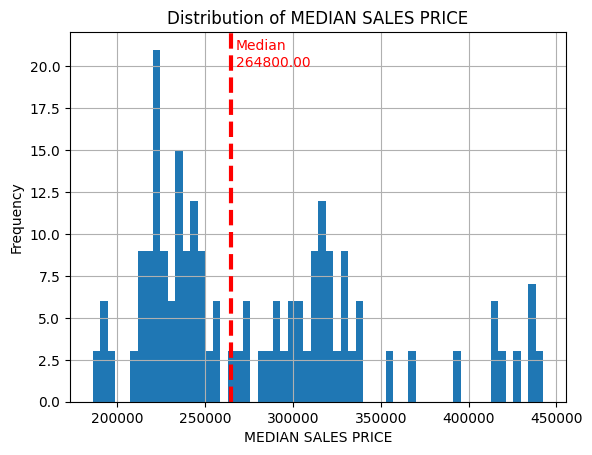

In [317]:
plt.hist(merged_df_1['MEDIAN SALES PRICE'], bins=60)
plt.xlabel("MEDIAN SALES PRICE")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['MEDIAN SALES PRICE'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['MEDIAN SALES PRICE'].median():.2f}", 
         x=1.01 * merged_df_1['MEDIAN SALES PRICE'].median(), 
         y=20, 
         size=10, 
         color='red')
# plt.axis([-10, 200, -10, 400000])
plt.title("Distribution of MEDIAN SALES PRICE")
plt.grid(True)
plt.show()

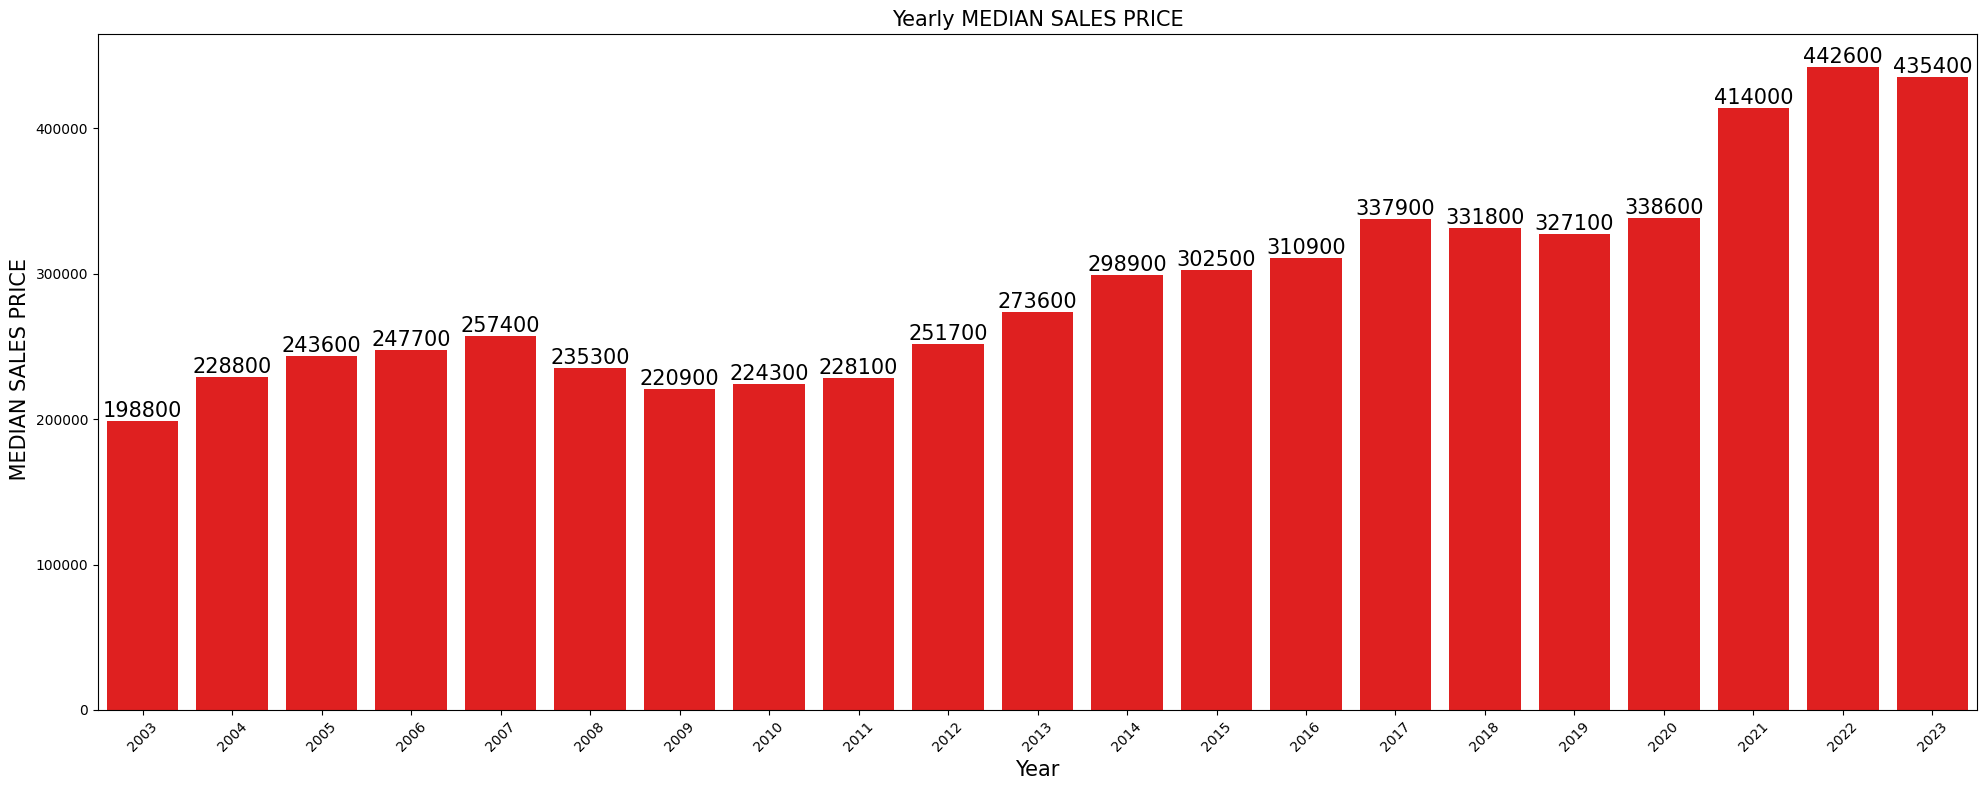

In [314]:
merged_df_1['Year'] = merged_df_1['DATE'].dt.year
yearly_MEDIAN_SALES_PRICE = merged_df_1.groupby('Year')['MEDIAN SALES PRICE'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x='Year', 
    y='MEDIAN SALES PRICE', 
    data=yearly_MEDIAN_SALES_PRICE, 
    color='red'
)

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size = 15)
plt.ylabel(' MEDIAN SALES PRICE', size = 15)
plt.title('Yearly MEDIAN SALES PRICE', size = 15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

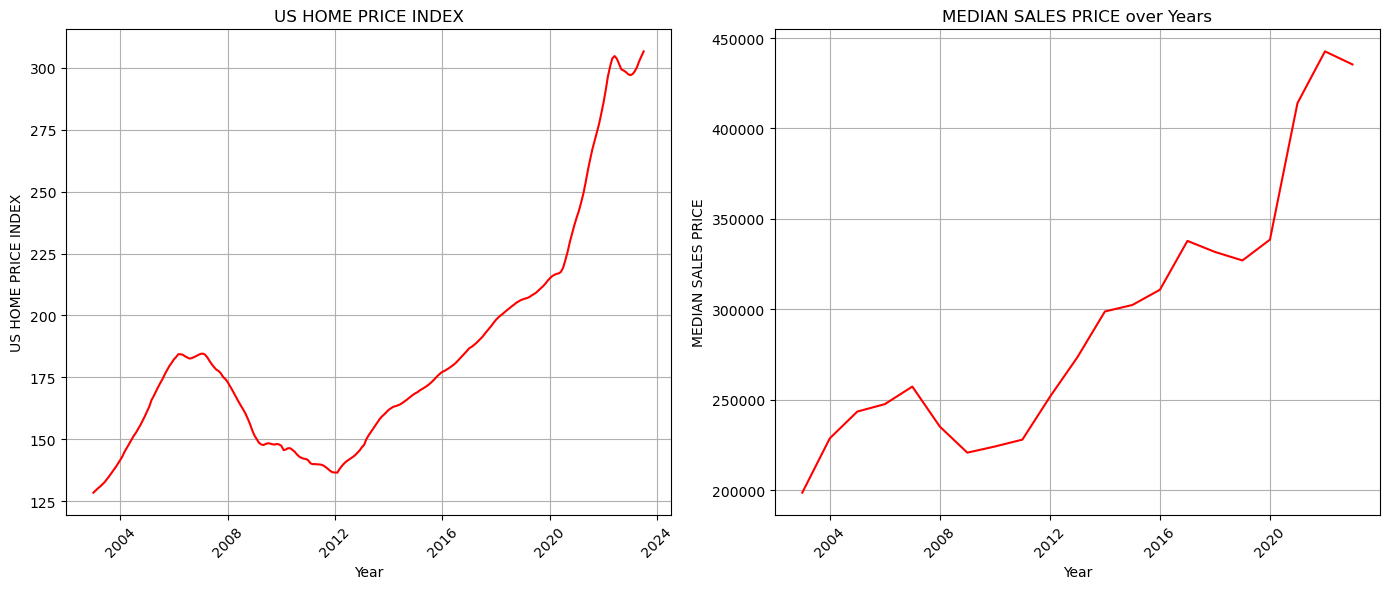

In [42]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hm_pr['US HOME PRICE INDEX'],'r')
plt.title('US HOME PRICE INDEX')
plt.xlabel('Year')
plt.ylabel('US HOME PRICE INDEX')
plt.xticks(rotation=45)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(yearly_MEDIAN_SALES_PRICE['Year'], yearly_MEDIAN_SALES_PRICE['MEDIAN SALES PRICE'],'r')
plt.xlabel('Year')
plt.ylabel('MEDIAN SALES PRICE')
plt.title('MEDIAN SALES PRICE over Years')
year_ticks = range(2004, yearly_MEDIAN_SALES_PRICE['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

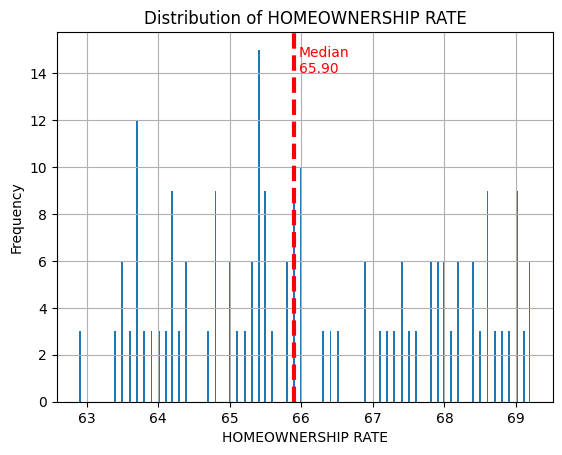

In [319]:
plt.hist(merged_df_1['HOMEOWNERSHIP RATE'], bins=247)
plt.xlabel("HOMEOWNERSHIP RATE")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['HOMEOWNERSHIP RATE'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['HOMEOWNERSHIP RATE'].median():.2f}", x=1.001 * merged_df_1['HOMEOWNERSHIP RATE'].median(), y=14, size=10, color='red')
# plt.axis([400000, 500000, 0, 5])
plt.title("Distribution of HOMEOWNERSHIP RATE")
plt.grid(True)
plt.show()

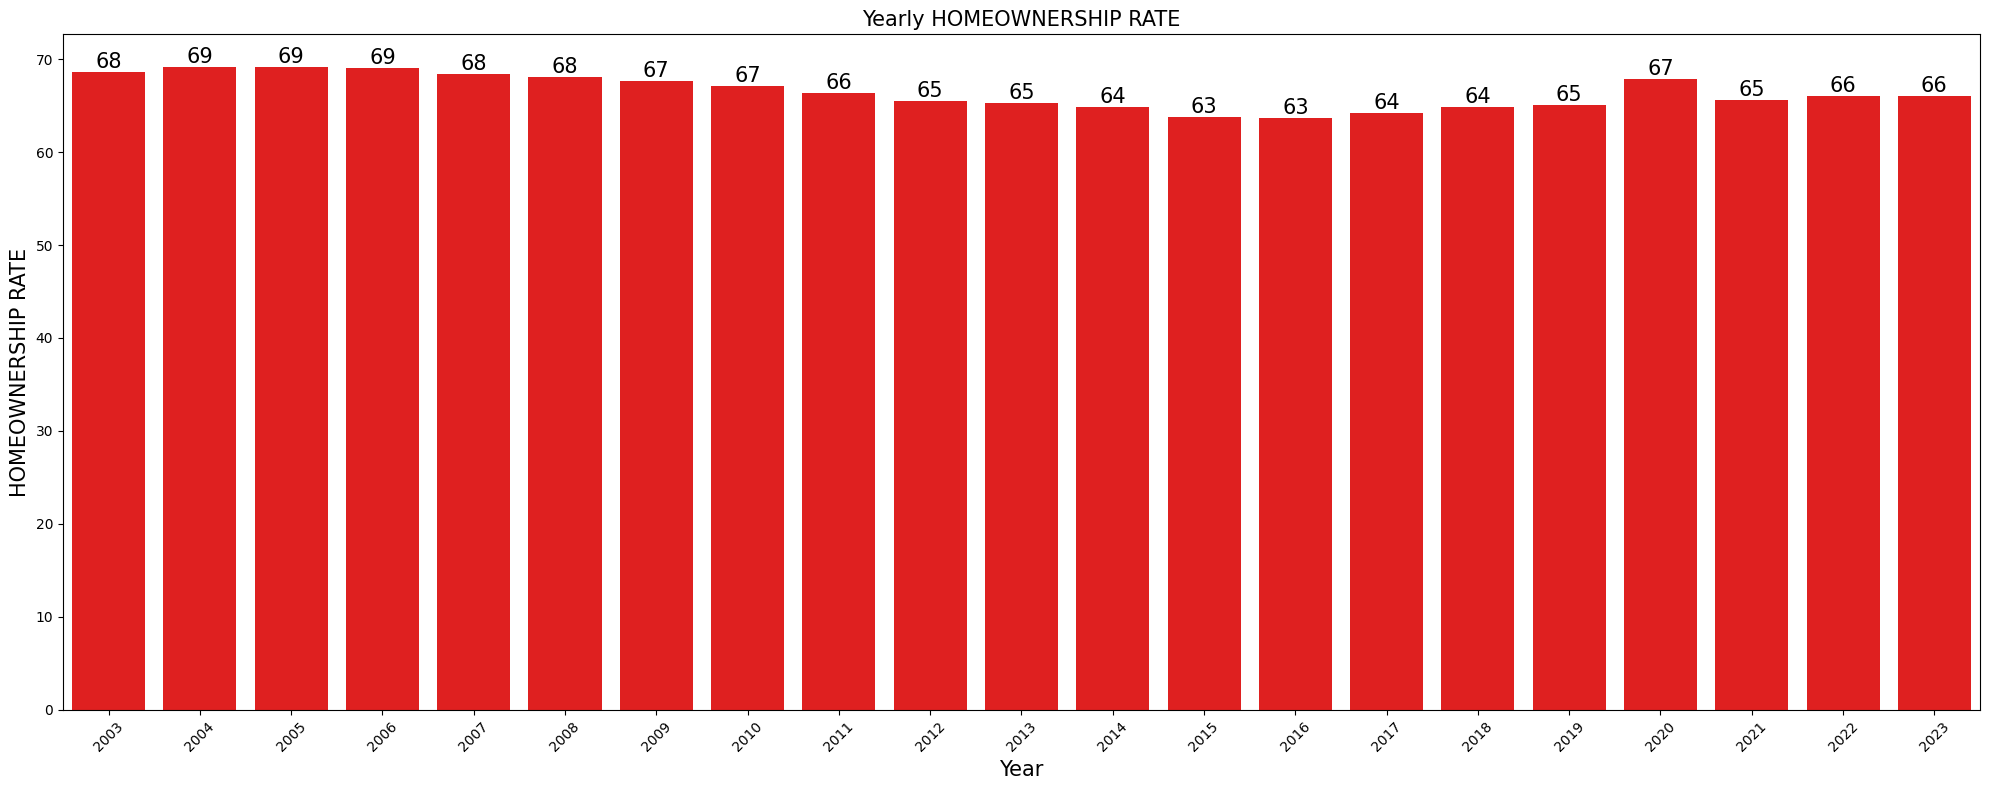

In [321]:
merged_df_1['Year'] = merged_df_1['DATE'].dt.year
yearly_Homeownership_rate = merged_df_1.groupby('Year')['HOMEOWNERSHIP RATE'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x='Year', 
    y='HOMEOWNERSHIP RATE', 
    data=yearly_Homeownership_rate, 
    color='red'
)

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size = 15)
plt.ylabel('HOMEOWNERSHIP RATE', size = 15)
plt.title('Yearly HOMEOWNERSHIP RATE', size = 15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

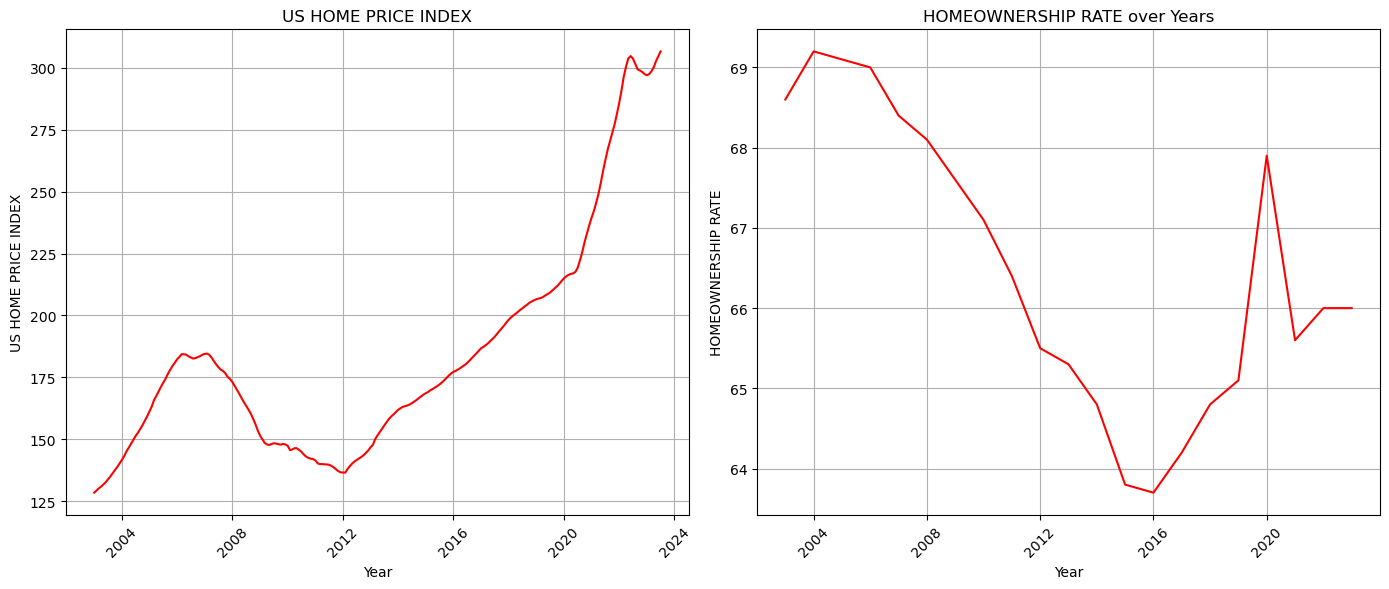

In [44]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hm_pr['US HOME PRICE INDEX'],'r')
plt.title('US HOME PRICE INDEX')
plt.xlabel('Year')
plt.ylabel('US HOME PRICE INDEX')
plt.xticks(rotation=45)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(yearly_Homeownership_rate['Year'], yearly_Homeownership_rate['HOMEOWNERSHIP RATE'],'r')
plt.xlabel('Year')
plt.ylabel('HOMEOWNERSHIP RATE')
plt.title('HOMEOWNERSHIP RATE over Years')
year_ticks = range(2004, yearly_Homeownership_rate['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

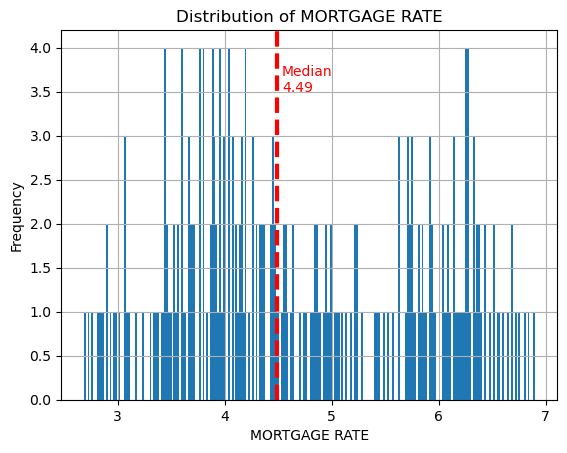

In [179]:
plt.hist(merged_df_1['MORTGAGE RATE'], bins=247)
plt.xlabel("MORTGAGE RATE")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['MORTGAGE RATE'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['MORTGAGE RATE'].median():.2f}", x=1.01 * merged_df_1['MORTGAGE RATE'].median(), y=3.5, size=10, color='red')
# plt.axis([62, 70, 0, 15])
plt.title("Distribution of MORTGAGE RATE")
plt.grid(True)
plt.show()

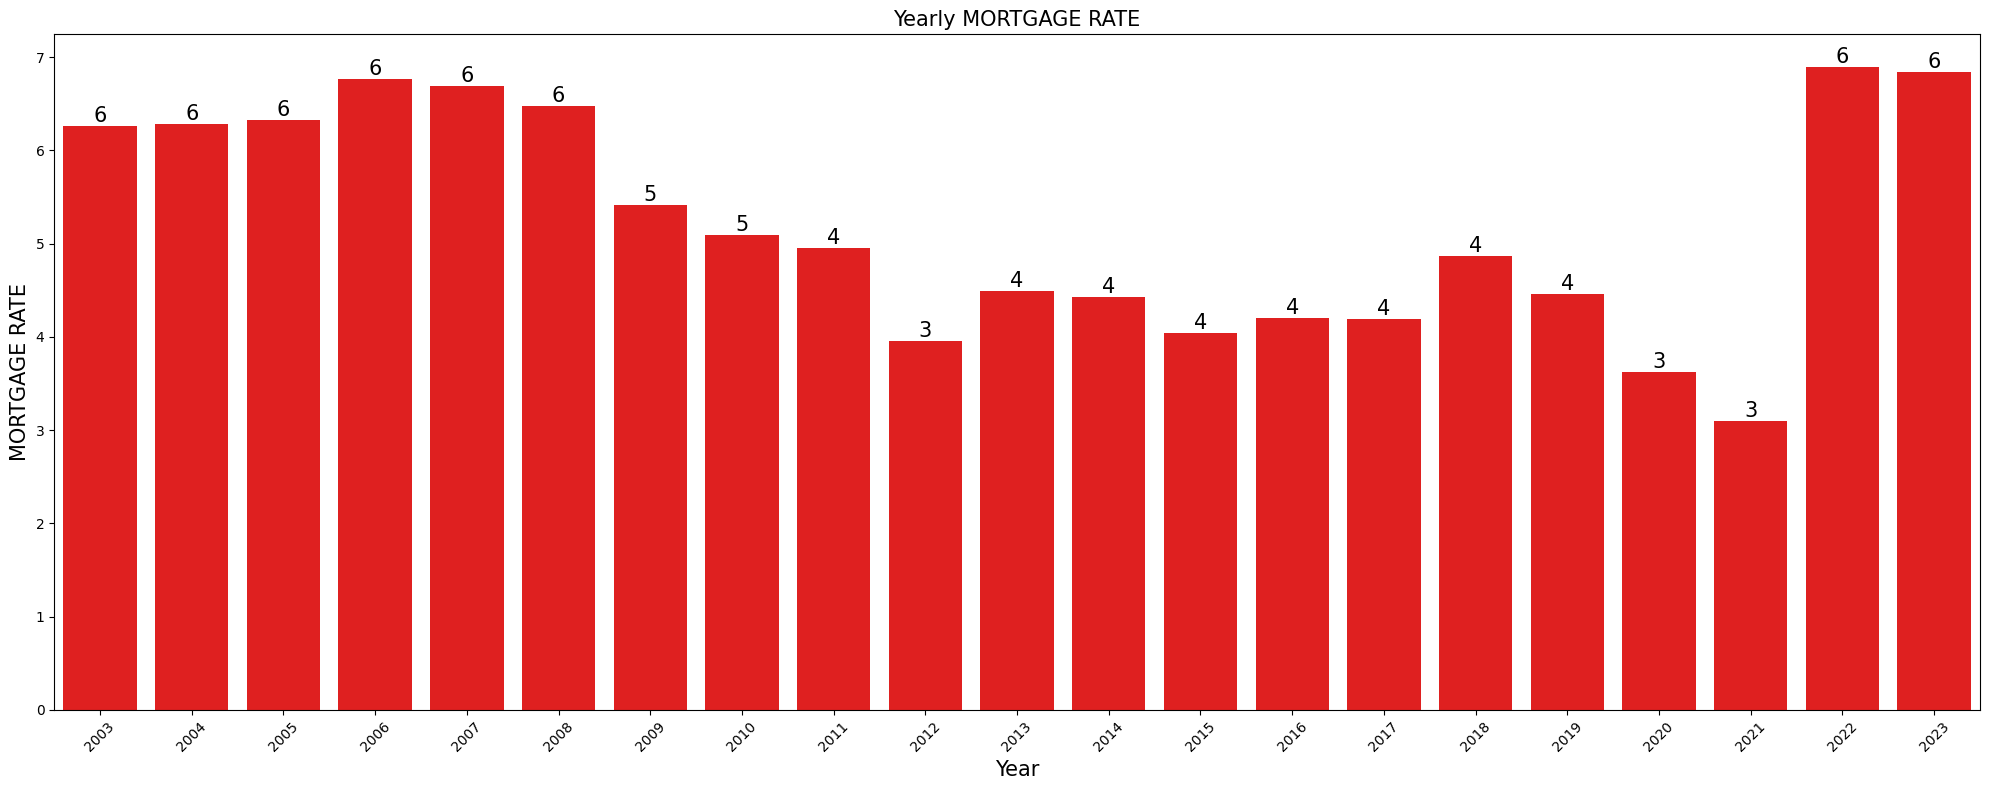

In [322]:
merged_df_1['Year'] = merged_df_1['DATE'].dt.year
yearly_MORTGAGE_RATE = merged_df_1.groupby('Year')['MORTGAGE RATE'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x='Year', 
    y='MORTGAGE RATE', 
    data=yearly_MORTGAGE_RATE, 
    color='red'
)

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size = 15)
plt.ylabel('MORTGAGE RATE', size = 15)
plt.title('Yearly MORTGAGE RATE', size = 15)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.grid(True)
plt.show()

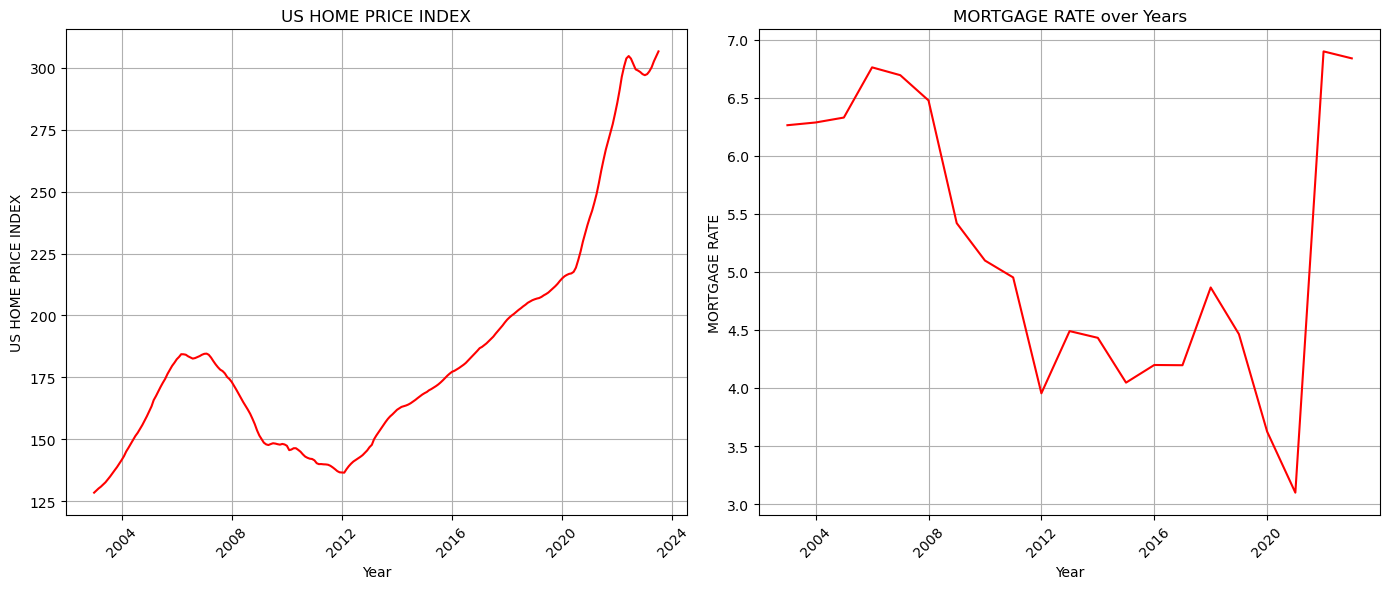

In [49]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hm_pr['US HOME PRICE INDEX'],'r')
plt.title('US HOME PRICE INDEX')
plt.xlabel('Year')
plt.ylabel('US HOME PRICE INDEX')
plt.xticks(rotation=45)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(yearly_MORTGAGE_RATE['Year'], yearly_MORTGAGE_RATE['MORTGAGE RATE'],'r')
plt.xlabel('Year')
plt.ylabel('MORTGAGE RATE')
plt.title('MORTGAGE RATE over Years')
year_ticks = range(2004, yearly_MORTGAGE_RATE['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

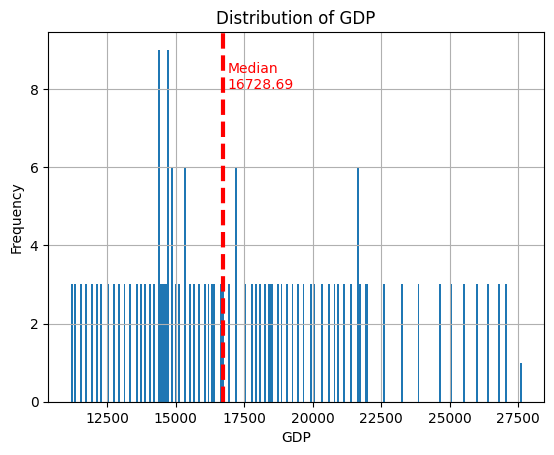

In [324]:
plt.hist(merged_df_1['GDP'], bins=247)
plt.xlabel("GDP")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['GDP'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['GDP'].median():.2f}", x=1.01 * merged_df_1['GDP'].median(), y=8, size=10, color='red')
# plt.axis([62, 70, 0, 15])
plt.title("Distribution of GDP")
plt.grid(True)
plt.show()

In [40]:
gdp_cleaned = pd.to_numeric(merged_df_1['GDP'], errors='coerce') 
gdp_cleaned = gdp_cleaned.dropna()

In [32]:
type(gdp)

pandas.core.frame.DataFrame

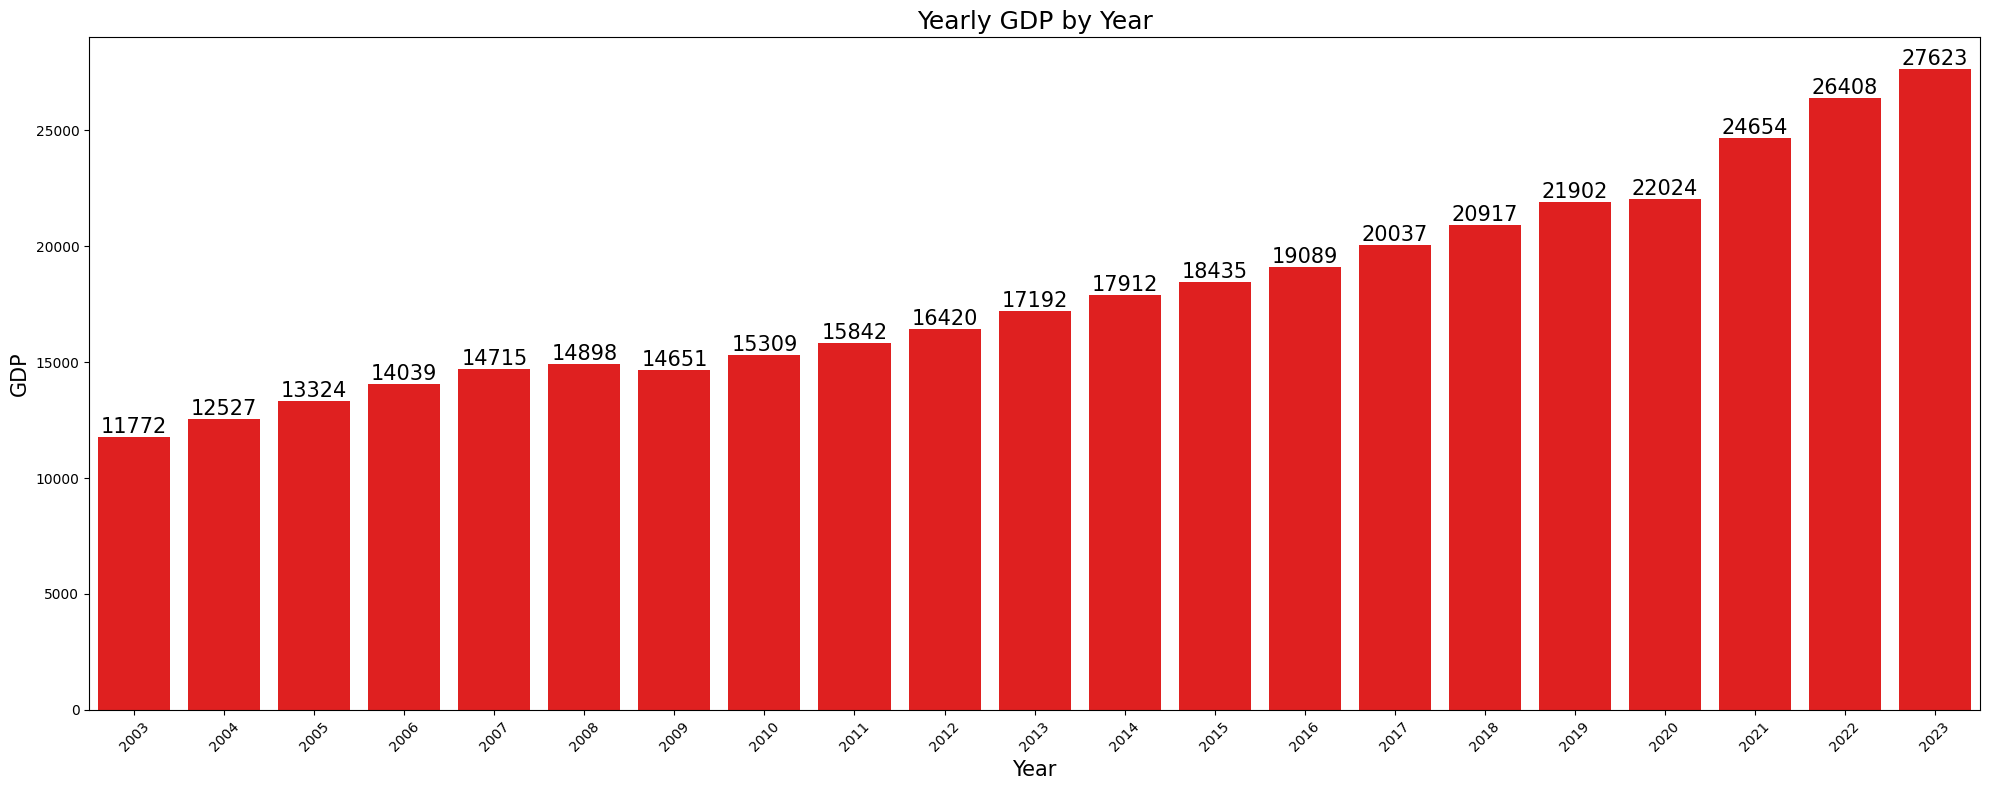

In [325]:
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'], errors='coerce')
merged_df_1['Year'] = merged_df_1['DATE'].dt.year
yearly_GDP = merged_df_1.groupby('Year')['GDP'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Year', y='GDP', data=yearly_GDP, color='red')

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size=15)
plt.ylabel('GDP', size=15)
plt.title('Yearly GDP by Year', size=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


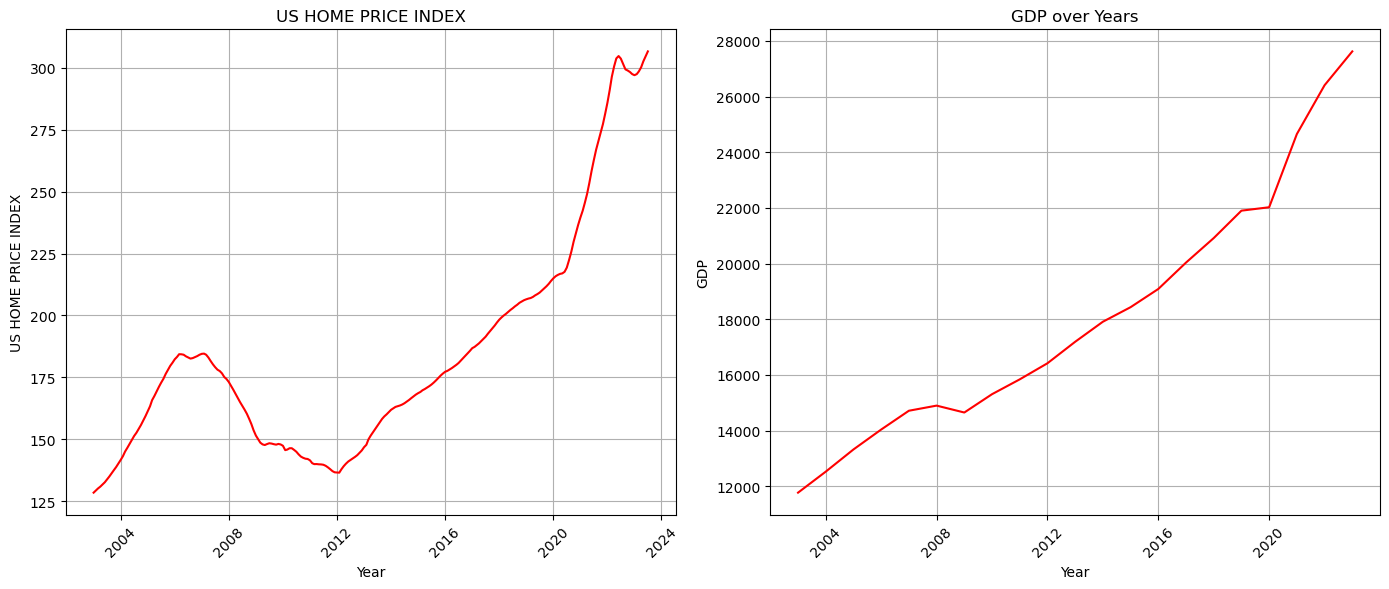

In [50]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hm_pr['US HOME PRICE INDEX'],'r')
plt.title('US HOME PRICE INDEX')
plt.xlabel('Year')
plt.ylabel('US HOME PRICE INDEX')
plt.xticks(rotation=45)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(yearly_GDP['Year'], yearly_GDP['GDP'],'r')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP over Years')
year_ticks = range(2004, yearly_GDP['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

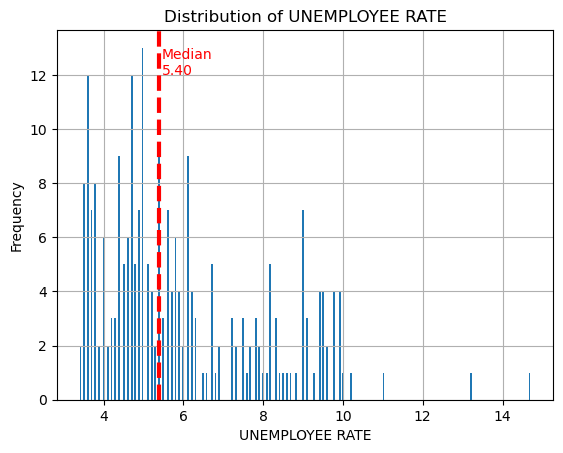

In [48]:
plt.hist(merged_df_1['UNEMPLOYEE RATE'], bins=247)
plt.xlabel("UNEMPLOYEE RATE")
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['UNEMPLOYEE RATE'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['UNEMPLOYEE RATE'].median():.2f}", x=1.01 * merged_df_1['UNEMPLOYEE RATE'].median(), y=12, size=10, color='red')
# plt.axis([62, 70, 0, 15])
plt.title("Distribution of UNEMPLOYEE RATE")
plt.grid(True)
plt.show()

Text(4.3, 1.3, 'UNEMPLOYEE RATE : \n Mean 5.94, sd 2.05 \n sample size 247 ')

<Figure size 640x480 with 0 Axes>

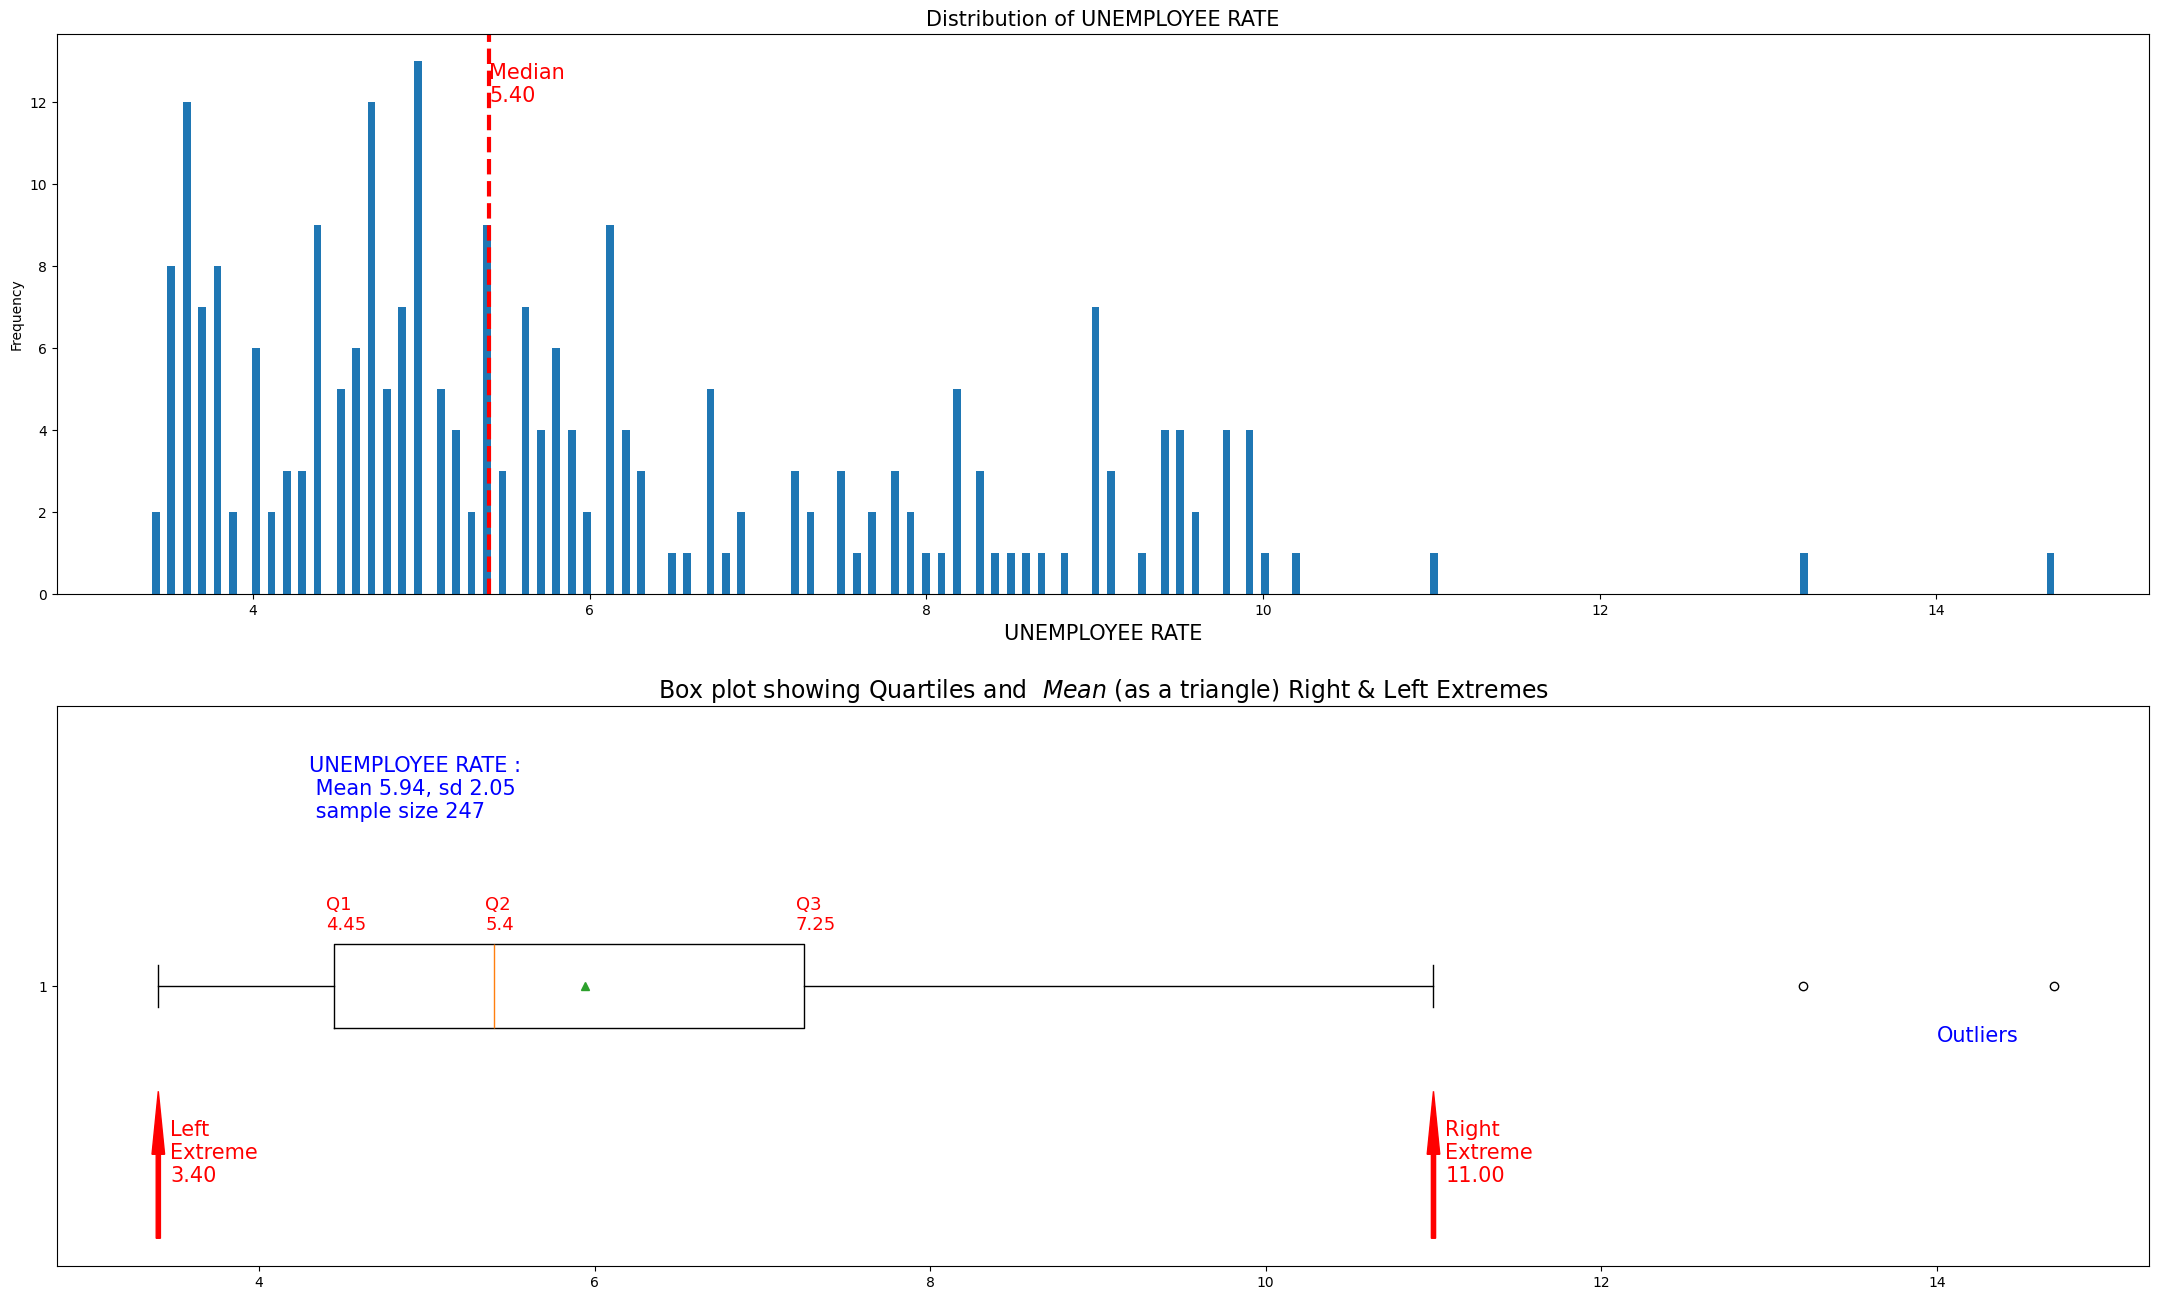

In [233]:
plt.subplots_adjust(hspace = 5.0) 
plt.figure(figsize=(27, 16))
plt.subplot(2,1, 1)
plt.hist(merged_df_1['UNEMPLOYEE RATE'], bins=247)
plt.xlabel("UNEMPLOYEE RATE",size=15)
plt.ylabel("Frequency")
plt.axvline(x=merged_df_1['UNEMPLOYEE RATE'].median(), color="red", linestyle="--", linewidth=3.0)
plt.text(s=f"Median\n{merged_df_1['UNEMPLOYEE RATE'].median():.2f}", x=1.0002 *merged_df_1['UNEMPLOYEE RATE'].median(), y=12, size=15, color='red')
# plt.axis([0, 150, 0, 5000])
plt.title("Distribution of UNEMPLOYEE RATE",size=15)


plt.subplot(2,1, 2)
Q1, Q2, Q3 = np.quantile(merged_df_1['UNEMPLOYEE RATE'], [.25, .5, .75] ).round(2)
W1 = (Q1 - 1.5*(Q3-Q1)).round(2)
W2 = (Q3 + 1.5*(Q3-Q1)).round(2)

# Create the boxplot and extract key data
boxplot = plt.boxplot(merged_df_1['UNEMPLOYEE RATE'], vert=False, showmeans=True, manage_ticks = True)


box_data = boxplot['whiskers']  

left_extreme = box_data[0].get_xdata()[1]  
right_extreme = box_data[1].get_xdata()[1]  # Extract right extreme
x_adj = 0.05  # Adjustment factor for improving display

# plt.text(s=f'Left_Whisker \n{W1}', x=W1 - 3 * x_adj, y=1.12, color='red', size=12)
# plt.text(s=f'Right_Whisker \n{W2}', x=W2 - 5 * x_adj, y=1.1, color='red', size=12)
# plt.text(s=f'Right_Whisker \n{W2}', x=W2 - 5 * x_adj, y=1.12, color='red', size=12)
plt.text(s=f'Q1 \n{Q1}', x=Q1 - x_adj, y=1.1, color='red', size=13)
plt.text(s=f'Q2 \n{Q2}', x=Q2 - x_adj, y=1.1, color='red', size=13)
# plt.text(s=f'Q2 \n{Q2}', x=187, y=1.1, color='red', size=9)
plt.text(s=f'Q3 \n{Q3}', x=Q3 - x_adj, y=1.1, color='red', size=13)
# plt.text(s=f'<-----IQR---->', x= Q1, y = .8, color = 'blue', size = 12  )
# plt.text(s='Outlier', x=left_extreme-1, y=0.9, color='blue', size=10)
plt.text(s='Outliers', x=14, y=0.9, color='blue', size=15)

plt.arrow(left_extreme, 0.55, 0,  0.15, color = 'red', width = 0.025)
# plt.text(s=f'Left \nExtreme\n{left_extreme:.2f}', x=left_extreme - 3 * x_adj, y=0.75, color='blue', size=12)
plt.text(s=f'Left \nExtreme\n{left_extreme:.2f}', x=left_extreme+0.07, y=0.65, color='red', size=15)
plt.arrow(right_extreme, 0.55, 0,  0.15, color = 'red', width = 0.025)
plt.text(s=f'Right \nExtreme\n{right_extreme:.2f}', x=right_extreme+0.07, y=0.65, color='red', size=15)
plt.title("Box plot showing Quartiles and  $Mean$ (as a triangle) Right & Left Extremes",size = 17)
plt.text(s=f"UNEMPLOYEE RATE : \n Mean {round(merged_df_1['UNEMPLOYEE RATE'].mean(), 2)}, sd {round(merged_df_1['UNEMPLOYEE RATE'].std(), 2)} \n sample size 247 ", 
         color='blue', size=15, x=Q1 - 0.15, y=1.3)

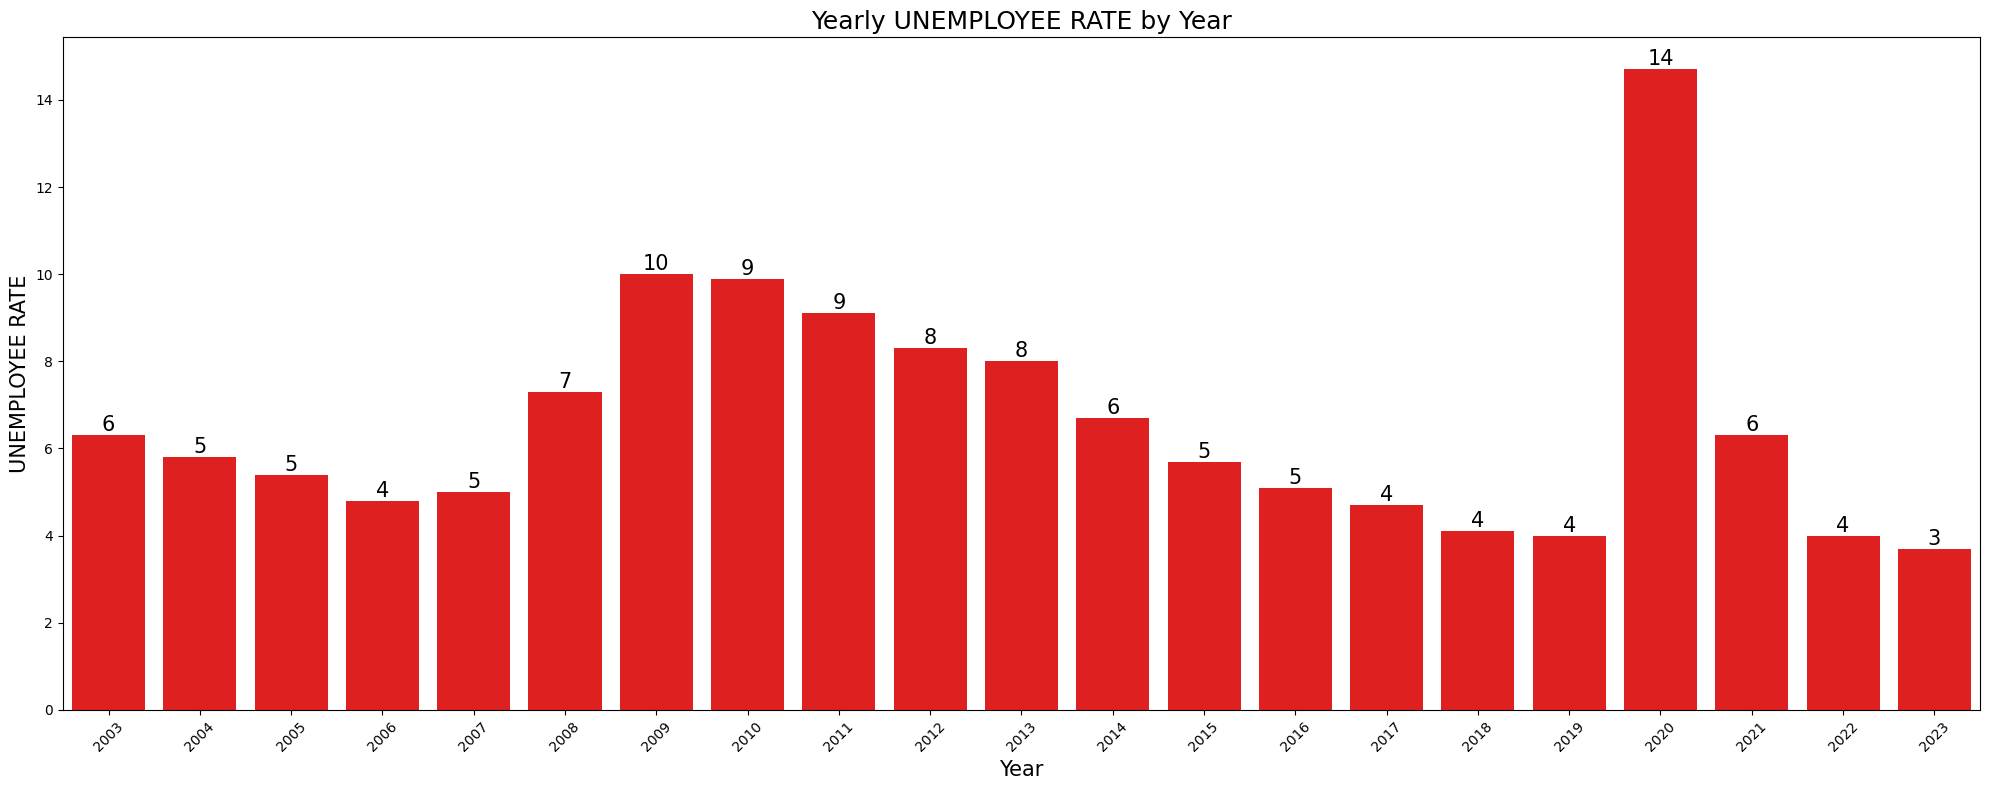

In [326]:
yearly_UNEMPLOYEE_RATE = merged_df_1.groupby('Year')['UNEMPLOYEE RATE'].max().reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Year', y='UNEMPLOYEE RATE', data=yearly_UNEMPLOYEE_RATE, color='red')

for bar in ax.patches:
    bar_height = bar.get_height()
    if bar_height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height,
            f'{int(bar_height)}',
            ha='center',
            va='bottom',
            fontsize=15,
            color='black'
        )

plt.xlabel('Year', size=15)
plt.ylabel('UNEMPLOYEE RATE', size=15)
plt.title('Yearly UNEMPLOYEE RATE by Year', size=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


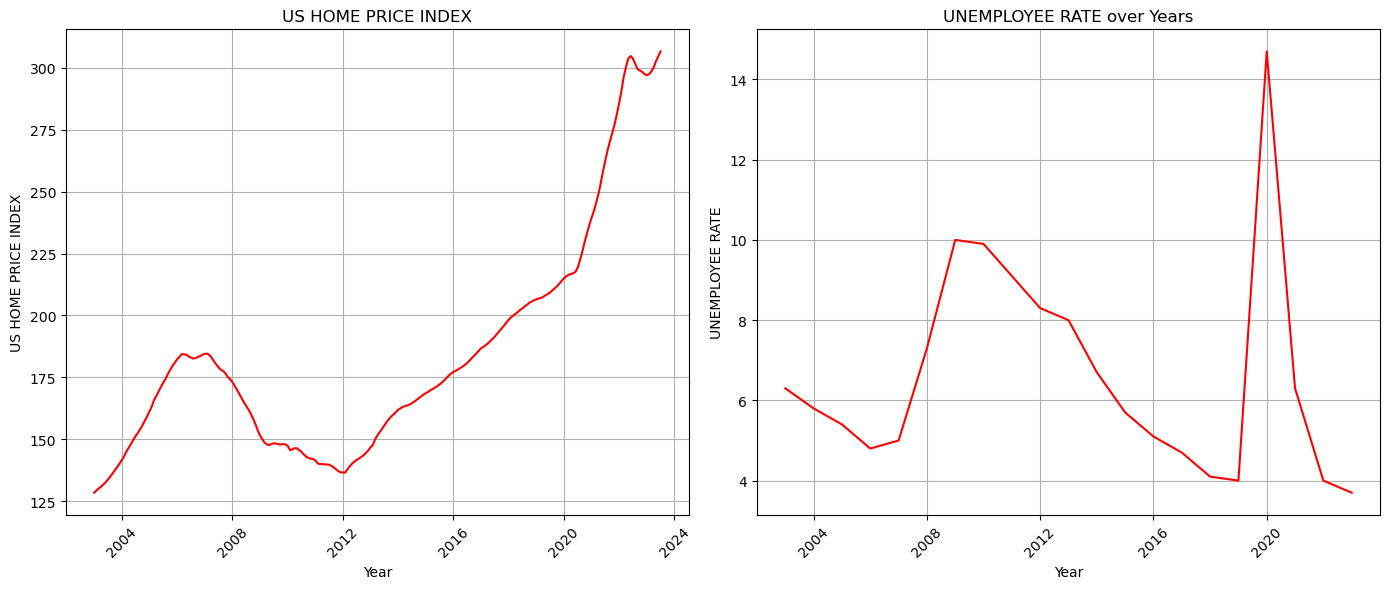

In [52]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hm_pr['US HOME PRICE INDEX'],'r')
plt.title('US HOME PRICE INDEX')
plt.xlabel('Year')
plt.ylabel('US HOME PRICE INDEX')
plt.xticks(rotation=45)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(yearly_UNEMPLOYEE_RATE['Year'], yearly_UNEMPLOYEE_RATE['UNEMPLOYEE RATE'],'r')
plt.xlabel('Year')
plt.ylabel('UNEMPLOYEE RATE')
plt.title('UNEMPLOYEE RATE over Years')
year_ticks = range(2004, yearly_UNEMPLOYEE_RATE['Year'].max() + 1, 4)
plt.xticks(year_ticks)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [330]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           247 non-null    datetime64[ns]
 1   POPULATION IN THOUSANDS MONTH  247 non-null    float64       
 2   HOUSING STARTS                 247 non-null    float64       
 3   MEDIAN SALES PRICE             247 non-null    int64         
 4   HOMEOWNERSHIP RATE             247 non-null    float64       
 5   MORTGAGE RATE                  247 non-null    float64       
 6   GDP                            247 non-null    float64       
 7   UNEMPLOYEE RATE                247 non-null    float64       
 8   US HOME PRICE INDEX            247 non-null    float64       
 9   Year                           247 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 21.2 KB


# C. Model Building 

## C.1. OLS REGRESSION

In [234]:
num_cols = [1,2,3,4,5,6,7] ## apply index numbers of numeric variables from df.info as features

features = merged_df_1[merged_df_1.columns[num_cols]]
type(features)  # check type of object created - it sis also a dataframe
features.head() # check
features = sm.add_constant(features)  # adding a_0

In [235]:
House_Price_Index =  merged_df_1[merged_df_1.columns[8]]
House_Price_Index
type(House_Price_Index)  # when one column is extrcated fm a dataframe, a series is returned.
House_Price_Index_linear_model = sm.OLS(House_Price_Index, features) # Ordinary Least Squares (OLS)
House_Price_Index_result = House_Price_Index_linear_model.fit()

In [236]:
# dir(House_Price_Index_result) # shows associated methods with this result object
print(House_Price_Index_result.summary()) 

                             OLS Regression Results                            
Dep. Variable:     US HOME PRICE INDEX   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     2301.
Date:                 Fri, 10 Jan 2025   Prob (F-statistic):          2.50e-215
Time:                         15:24:26   Log-Likelihood:                -770.21
No. Observations:                  247   AIC:                             1556.
Df Residuals:                      239   BIC:                             1584.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

In [241]:
p_values = {
    'const': 0.000,
    'POPULATION IN THOUSANDS MONTH': 0.186,
    'HOUSING STARTS': 0.881,
    'MEDIAN SALES PRICE': 0.000,
    'HOMEOWNERSHIP RATE': 0.000,
    'MORTGAGE RATE': 0.628,
    'GDP': 0.000,
    'UNEMPLOYEE RATE': 0.000
}
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Variable', 'P-Value'])
p_values_df

,Variable,P-Value
0,const,0.000
1,POPULATION IN THOUSANDS MONTH,0.186
2,HOUSING STARTS,0.881
3,MEDIAN SALES PRICE,0.000
4,HOMEOWNERSHIP RATE,0.000
5,MORTGAGE RATE,0.628
6,GDP,0.000
7,UNEMPLOYEE RATE,0.000


In [334]:
merged_df_1.columns

Index(['DATE', 'POPULATION IN THOUSANDS MONTH', 'HOUSING STARTS',
       'MEDIAN SALES PRICE', 'HOMEOWNERSHIP RATE', 'MORTGAGE RATE', 'GDP',
       'UNEMPLOYEE RATE', 'US HOME PRICE INDEX', 'Year'],
      dtype='object')

In [338]:
merged_df_1.to_excel(r'C:\Users\Sanjoy\Desktop\US Home Price Influnces\Merged Data\merged_df_1.xlsx', index=False)


# C.2.  ARIMA(Autoregressive Integrated Moving Average) and Seasonal ARIMA Forecast 

### Autoregressive Integrated Moving Averages
### The general process for ARIMA models -->

### 1.Visualize the Time Series Data
### 2.Make the time series data stationary
### 3.Plot the Correlation and AutoCorrelation Charts
### 4.Construct the ARIMA Model or Seasonal ARIMA based on the data
### 5.Use the model to make predictions

In [186]:
merged_df_1 = pd.read_excel(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Merged Data\merged_df_1.xlsx")

In [171]:
merged_df_1.head()

,DATE,POPULATION IN THOUSANDS MONTH,HOUSING STARTS,MEDIAN SALES PRICE,HOMEOWNERSHIP RATE,MORTGAGE RATE,GDP,UNEMPLOYEE RATE,US HOME PRICE INDEX,Year
0,2003-01-01,289412,1853,186000,68.0,5.9160,11174.129,5.8,128.461,2003
1,2003-02-01,289606,1629,186000,68.0,5.8425,11174.129,5.9,129.355,2003
2,2003-03-01,289809,1726,186000,68.0,5.7450,11174.129,5.9,130.148,2003
3,2003-04-01,290024,1643,191800,68.0,5.8125,11312.766,6.0,130.884,2003
4,2003-05-01,290250,1751,191800,68.0,5.4840,11312.766,6.1,131.735,2003


In [172]:
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'])
merged_df_1.set_index('DATE', inplace=True)

# C.1. Visualize the Data

<Axes: xlabel='DATE'>

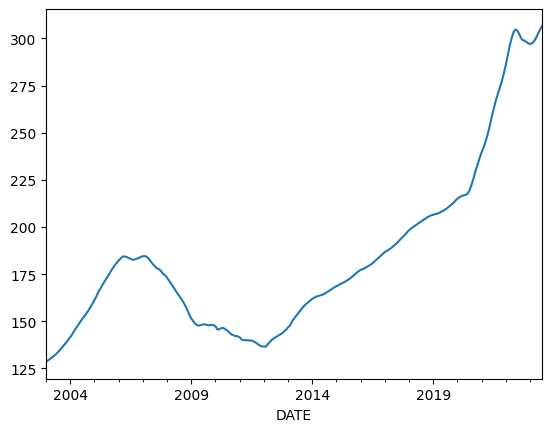

In [173]:
merged_df_1['US HOME PRICE INDEX'].plot()

In [188]:
test_result=adfuller(merged_df_1['US HOME PRICE INDEX'])

In [189]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [190]:
adfuller_test(merged_df_1['US HOME PRICE INDEX'])

ADF Test Statistic : 0.4427326357381571
p-value : 0.9830245421451717
#Lags Used : 14
Number of Observations Used : 232
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## C.2 Differencing

In [191]:
merged_df_1['US HOME PRICE INDEX First Difference'] = merged_df_1['US HOME PRICE INDEX'] - merged_df_1['US HOME PRICE INDEX'].shift(1)

In [192]:
merged_df_1['US HOME PRICE INDEX'].shift(1)

0          NaN
1      128.461
2      129.355
3      130.148
4      130.884
        ...   
242    297.464
243    298.539
244    300.198
245    302.620
246    304.651
Name: US HOME PRICE INDEX, Length: 247, dtype: float64

In [33]:
merged_df_1['US HOME PRICE INDEX Seasonal First Difference'] = merged_df_1['US HOME PRICE INDEX'] - merged_df_1['US HOME PRICE INDEX'].shift(12)

In [20]:
merged_df_1['US HOME PRICE INDEX'].shift(12)

DATE
2003-01-01        NaN
2003-02-01        NaN
2003-03-01        NaN
2003-04-01        NaN
2003-05-01        NaN
               ...   
2023-03-01    296.353
2023-04-01    300.550
2023-05-01    303.796
2023-06-01    304.755
2023-07-01    303.714
Name: US HOME PRICE INDEX, Length: 247, dtype: float64

<Axes: xlabel='DATE'>

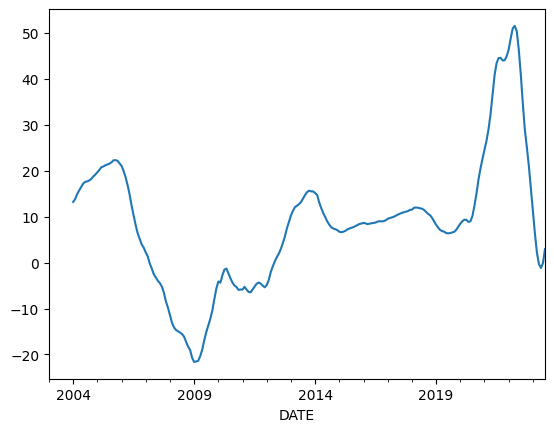

In [34]:
merged_df_1['US HOME PRICE INDEX Seasonal First Difference'].plot()

In [35]:
# Again test dickey fuller test
adfuller_test(merged_df_1['US HOME PRICE INDEX Seasonal First Difference'].dropna())

ADF Test Statistic : -2.118229698192788
p-value : 0.2372478076367157
#Lags Used : 13
Number of Observations Used : 221
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
def adf_test(series):
    result = adfuller(series)
    return result[1]  

def check_stationarity_with_diffs(series, max_diffs=5):
    for diff in range(1, max_diffs + 1):
        series_diff = series.diff(periods=diff).dropna()
        p_value = adf_test(series_diff)
        print(f"Differencing {diff} - ADF p-value: {p_value}")
        
        if p_value < 0.05:
            print(f"Stationary after {diff} differences.\n")
            return diff
    print(f"Even after {max_diffs} differences, the series is not stationary.\n")
    return None

num_shifts = check_stationarity_with_diffs(merged_df_1['US HOME PRICE INDEX Seasonal First Difference'])
print(f"The number of shifts required to make the series stationary is: {num_shifts}")


Differencing 1 - ADF p-value: 0.0091595238249101
Stationary after 1 differences.

The number of shifts required to make the series stationary is: 1


In [51]:
merged_df_1['US HOME PRICE INDEX Seasonal First Difference One More Shift'] = merged_df_1['US HOME PRICE INDEX'] - merged_df_1['US HOME PRICE INDEX'].shift(13)

<Axes: xlabel='DATE'>

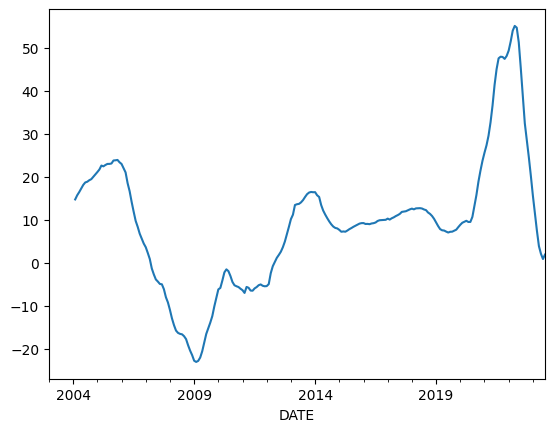

In [39]:
merged_df_1['US HOME PRICE INDEX Seasonal First Difference One More Shift'].plot()

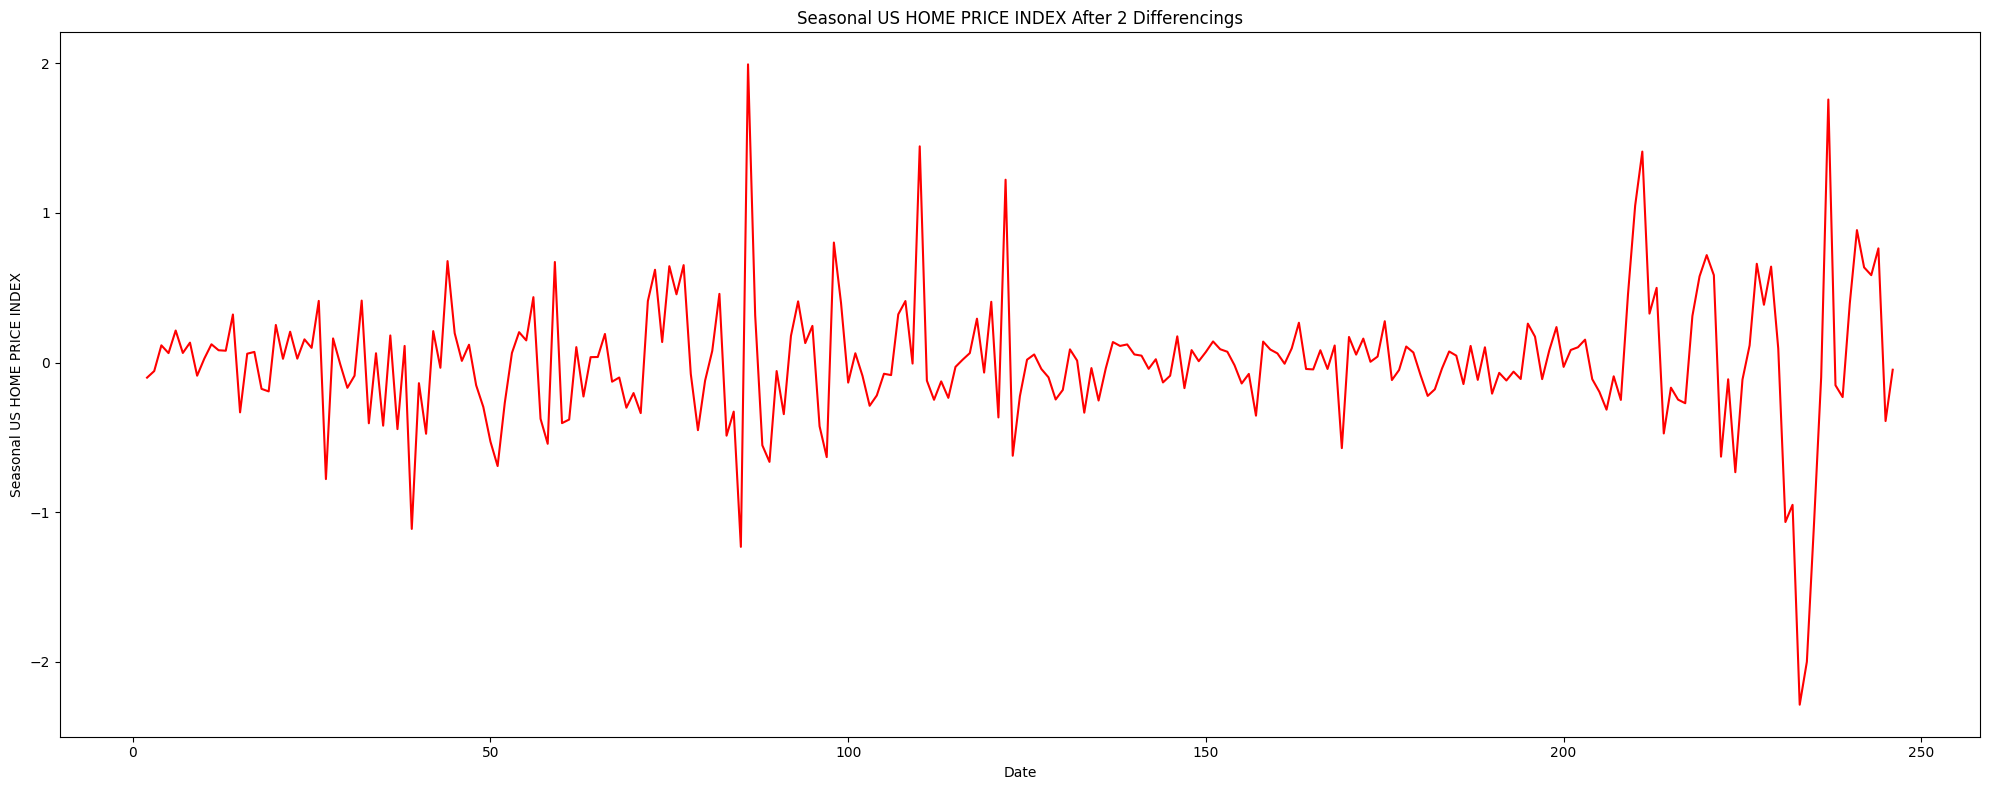

,DATE,Seasonal US HOME PRICE INDEX
0,2003-01-01,NaN
1,2003-02-01,NaN
2,2003-03-01,-0.101
3,2003-04-01,-0.057
4,2003-05-01,0.115


In [194]:
def adf_test(series):
    result = adfuller(series)
    return result[1]

def check_stationarity(series, max_diff=5):
    p_value = adf_test(series)
    diff_count = 0
    
    while p_value > 0.05 and diff_count < max_diff:
        series = series.diff().dropna()
        p_value = adf_test(series)
        diff_count += 1
    
    return diff_count, series

diff_count, stationary_series = check_stationarity(merged_df_1['US HOME PRICE INDEX'])

seasonal_df = pd.DataFrame({
    'DATE': merged_df_1['DATE'],
    'Seasonal US HOME PRICE INDEX': stationary_series
})

plt.figure(figsize=(20, 8))
plt.plot(seasonal_df['Seasonal US HOME PRICE INDEX'], color='red')
plt.xlabel('Date')
plt.ylabel('Seasonal US HOME PRICE INDEX')
plt.title(f'Seasonal US HOME PRICE INDEX After {diff_count} Differencings')
plt.tight_layout()
plt.show()

seasonal_df.head()

In [182]:
merged_df_1.columns

Index(['POPULATION IN THOUSANDS MONTH', 'HOUSING STARTS', 'MEDIAN SALES PRICE',
       'HOMEOWNERSHIP RATE', 'MORTGAGE RATE', 'GDP', 'UNEMPLOYEE RATE',
       'US HOME PRICE INDEX', 'Year', 'US HOME PRICE INDEX First Difference'],
      dtype='object')

In [195]:
merged_df_1['US HOME PRICE INDEX Seasonal First Difference'] = merged_df_1['US HOME PRICE INDEX'] - merged_df_1['US HOME PRICE INDEX'].shift(2)

In [196]:
adfuller_test(seasonal_df['Seasonal US HOME PRICE INDEX'].dropna())

ADF Test Statistic : -5.452628875937563
p-value : 2.6236821101542977e-06
#Lags Used : 12
Number of Observations Used : 232
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# C.3. Auto Regressive Model

## C.3.1. Autocorrelation and Partial Autocorrelation

C:\Users\Sanjoy\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


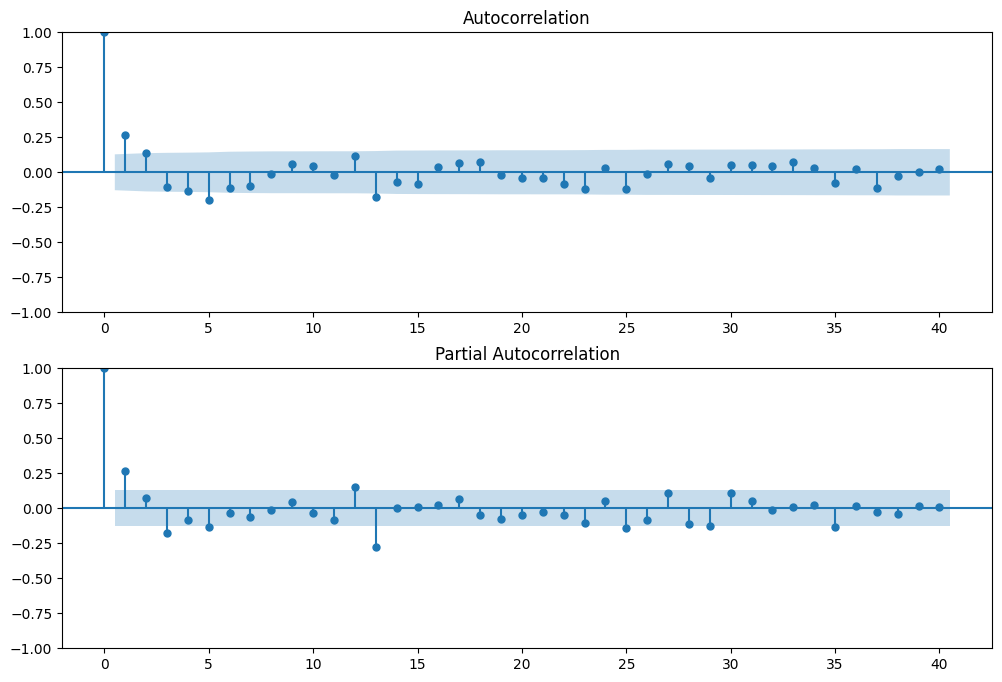

In [198]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(seasonal_df['Seasonal US HOME PRICE INDEX'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonal_df['Seasonal US HOME PRICE INDEX'].iloc[13:],lags=40,ax=ax2)

### For non-seasonal data
###  p=1, d=1, q=0 or 1

In [200]:
model = ARIMA(seasonal_df['Seasonal US HOME PRICE INDEX'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                                    SARIMAX Results                                     
Dep. Variable:     Seasonal US HOME PRICE INDEX   No. Observations:                  247
Model:                           ARIMA(1, 1, 1)   Log Likelihood                -153.822
Date:                          Fri, 10 Jan 2025   AIC                            313.644
Time:                                  13:25:23   BIC                            324.160
Sample:                                       0   HQIC                           317.878
                                          - 247                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2673      0.035      7.615      0.000       0.199       0.336
ma.L1         -0.9997      0.597     -1.676      0.

In [201]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Seasonal US HOME PRICE INDEX   No. Observations:                  247
Model:                           ARIMA(1, 1, 1)   Log Likelihood                -153.822
Date:                          Fri, 10 Jan 2025   AIC                            313.644
Time:                                  13:25:34   BIC                            324.160
Sample:                                       0   HQIC                           317.878
                                          - 247                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2673      0.035      7.615      0.000       0.199       0.336
ma.L1         -0.9997      0.597     -1.676      0.094      -2.169       0.170
sigma2         0.1900      0.114      1.664      0.096      -0.034       0.414
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               442.09
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
seasonal_df.set_index('DATE', inplace=True)

<Axes: >

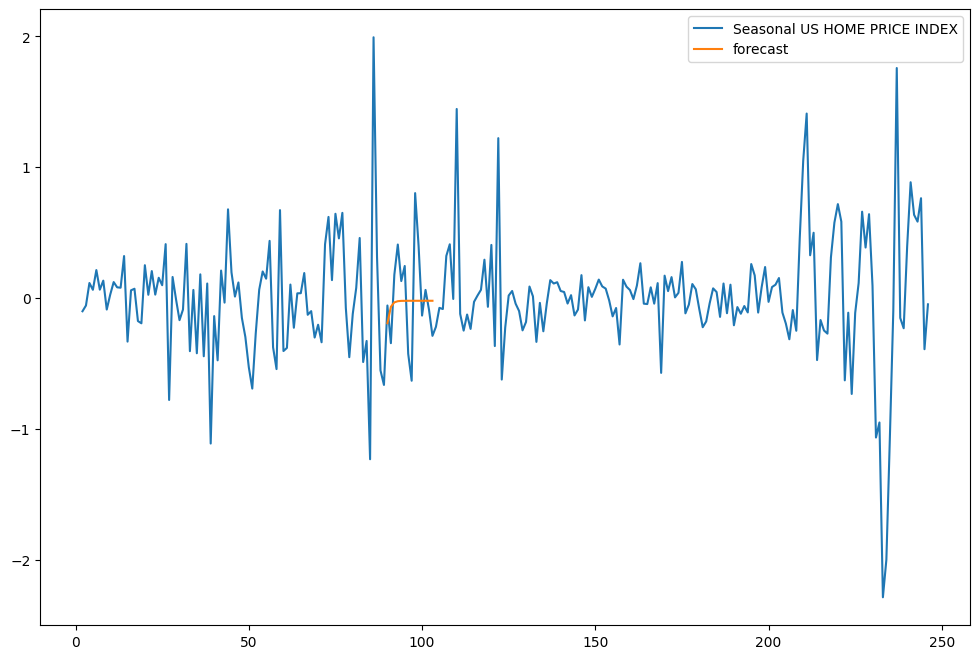

In [80]:
seasonal_df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
seasonal_df[['Seasonal US HOME PRICE INDEX','forecast']].plot(figsize=(12,8))

In [82]:
model=sm.tsa.statespace.SARIMAX(seasonal_df['Seasonal US HOME PRICE INDEX'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

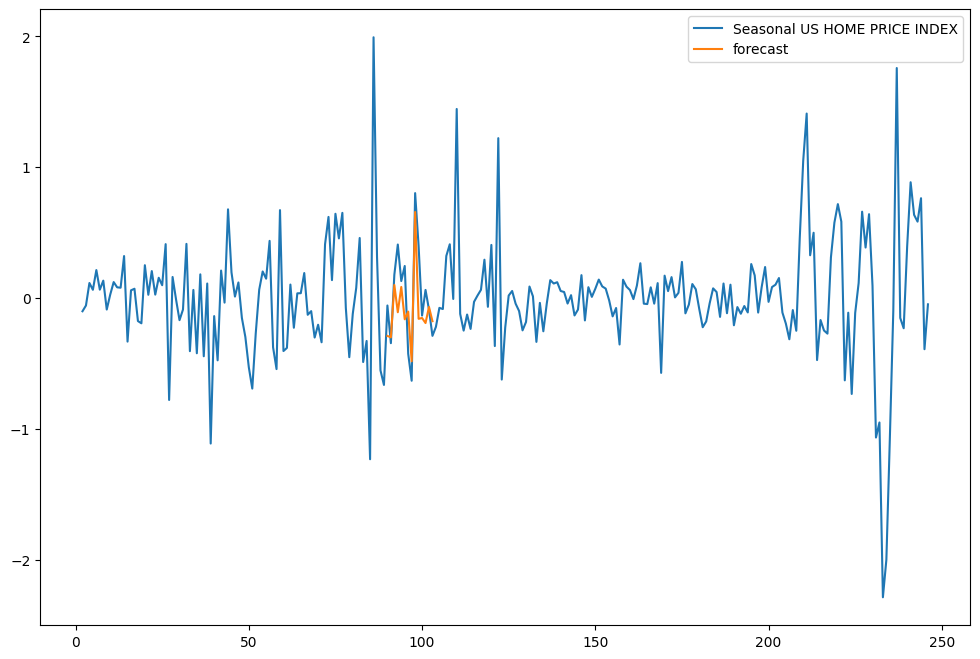

In [83]:
seasonal_df['forecast']=results.predict(start=90,end=103,dynamic=True)
seasonal_df[['Seasonal US HOME PRICE INDEX','forecast']].plot(figsize=(12,8))

In [99]:
seasonal_df.columns

Index(['DATE', 'Seasonal US HOME PRICE INDEX', 'forecast'], dtype='object')

In [117]:
seasonal_df.columns

Index(['DATE', 'Seasonal US HOME PRICE INDEX'], dtype='object')

In [203]:
seasonal_df['DATE'] = pd.to_datetime(seasonal_df['DATE'])
seasonal_df.set_index('DATE', inplace=True)

In [147]:
seasonal_df.shape

(247, 1)

In [204]:
date_range = pd.date_range(start="2003-01-03", end="2005-01-01", freq='MS')
seasonal_df.loc[date_range, 'forecast'] = seasonal_df.loc[date_range, 'Seasonal US HOME PRICE INDEX'].values

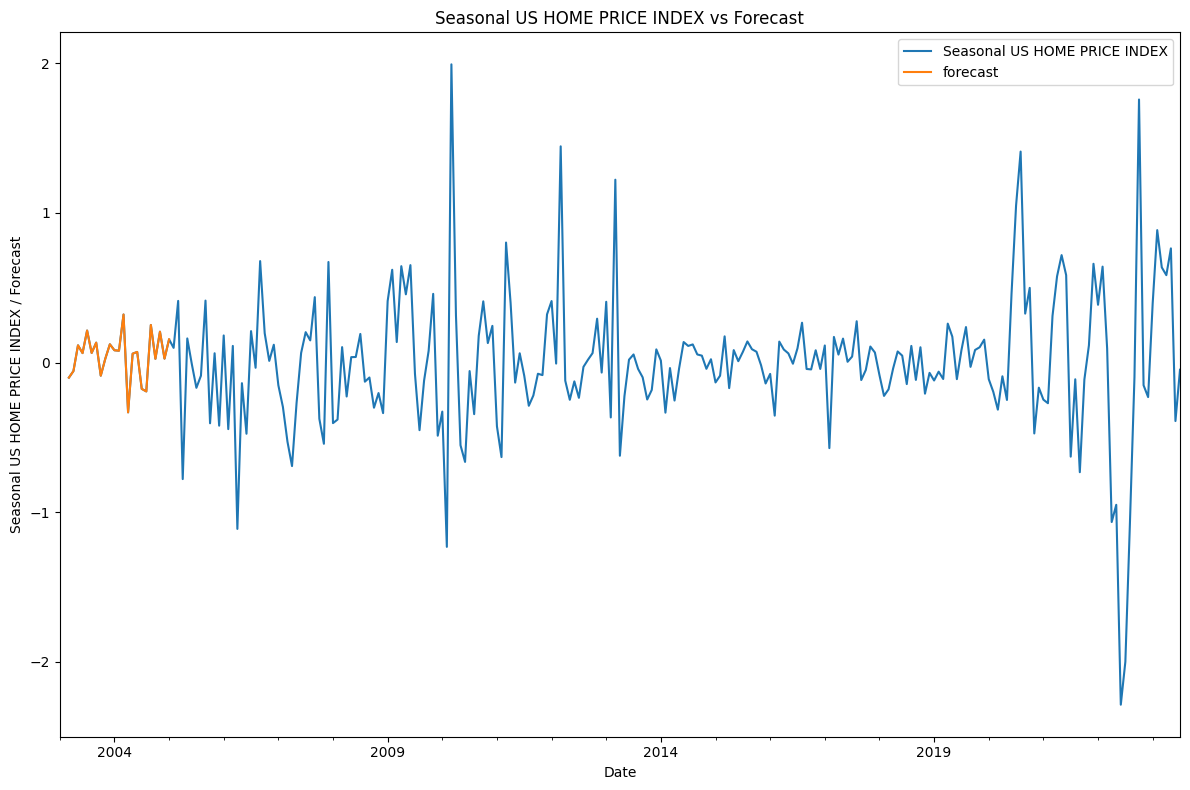

In [151]:
seasonal_df[['Seasonal US HOME PRICE INDEX', 'forecast']].plot(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Seasonal US HOME PRICE INDEX / Forecast')
plt.title('Seasonal US HOME PRICE INDEX vs Forecast')
plt.tight_layout()
plt.show()

In [161]:
future_dates = pd.date_range(start=seasonal_df.index[-1] + pd.Timedelta(days=1), periods=12, freq='MS')
future_forecast = pd.DataFrame({
    'DATE': future_dates,
    'forecast': seasonal_df['Seasonal US HOME PRICE INDEX'].iloc[-12:].values 
})
future_forecast.set_index('DATE', inplace=True)
seasonal_df = seasonal_df.append(future_forecast)

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_2784\3667557434.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seasonal_df = seasonal_df.append(future_forecast)


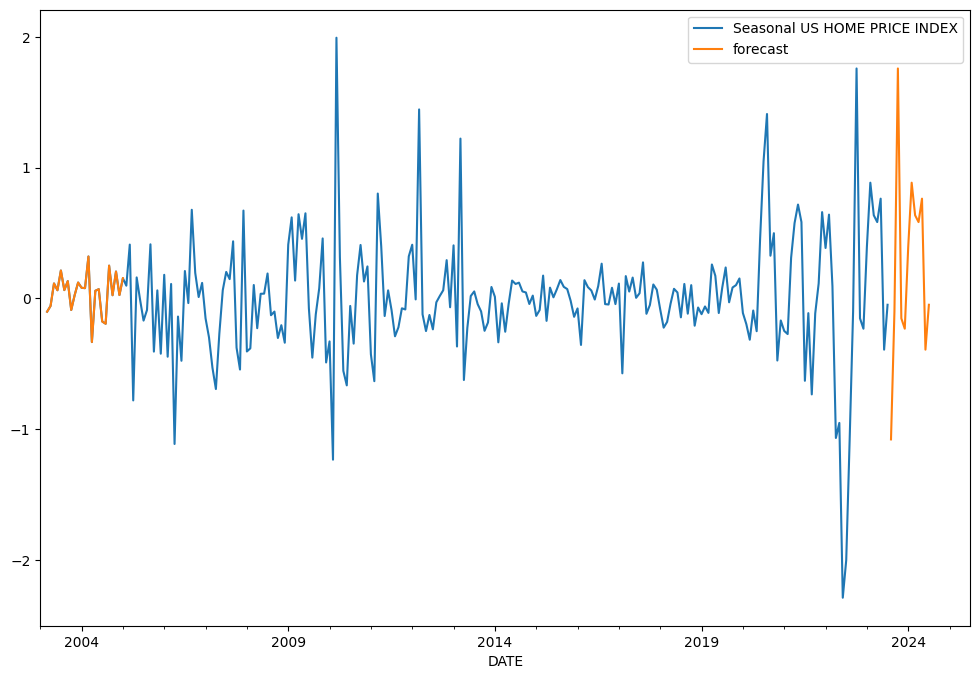

In [162]:
seasonal_df[['Seasonal US HOME PRICE INDEX', 'forecast']].plot(figsize=(12, 8))
plt.show()

## C.4. Mutiple Columns Using VAR(Vector autoregression)

In [3]:
merged_df_1 = pd.read_excel(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Merged Data\merged_df_1.xlsx")

In [4]:
merged_df_1.shape

(247, 10)

In [5]:
merged_df_1.columns

Index(['DATE', 'POPULATION IN THOUSANDS MONTH', 'HOUSING STARTS',
       'MEDIAN SALES PRICE', 'HOMEOWNERSHIP RATE', 'MORTGAGE RATE', 'GDP',
       'UNEMPLOYEE RATE', 'US HOME PRICE INDEX', 'Year'],
      dtype='object')

# VAR

In [7]:
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'])  
merged_df_1.set_index('DATE', inplace=True) 

# Select relevant columns
target_column = 'US HOME PRICE INDEX'
columns_for_VAR = ['US HOME PRICE INDEX', 'POPULATION IN THOUSANDS MONTH', 'GDP', 'HOUSING STARTS', 'MEDIAN SALES PRICE', 'HOMEOWNERSHIP RATE', 'MORTGAGE RATE', 'UNEMPLOYEE RATE']

# Drop missing values
data = merged_df_1[columns_for_VAR].dropna()
data.shape

(247, 8)

In [8]:
data.columns

Index(['US HOME PRICE INDEX', 'POPULATION IN THOUSANDS MONTH', 'GDP',
       'HOUSING STARTS', 'MEDIAN SALES PRICE', 'HOMEOWNERSHIP RATE',
       'MORTGAGE RATE', 'UNEMPLOYEE RATE'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2003-01-01 to 2023-07-01
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   US HOME PRICE INDEX            247 non-null    float64
 1   POPULATION IN THOUSANDS MONTH  247 non-null    int64  
 2   GDP                            247 non-null    float64
 3   HOUSING STARTS                 247 non-null    int64  
 4   MEDIAN SALES PRICE             247 non-null    int64  
 5   HOMEOWNERSHIP RATE             247 non-null    float64
 6   MORTGAGE RATE                  247 non-null    float64
 7   UNEMPLOYEE RATE                247 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 17.4 KB


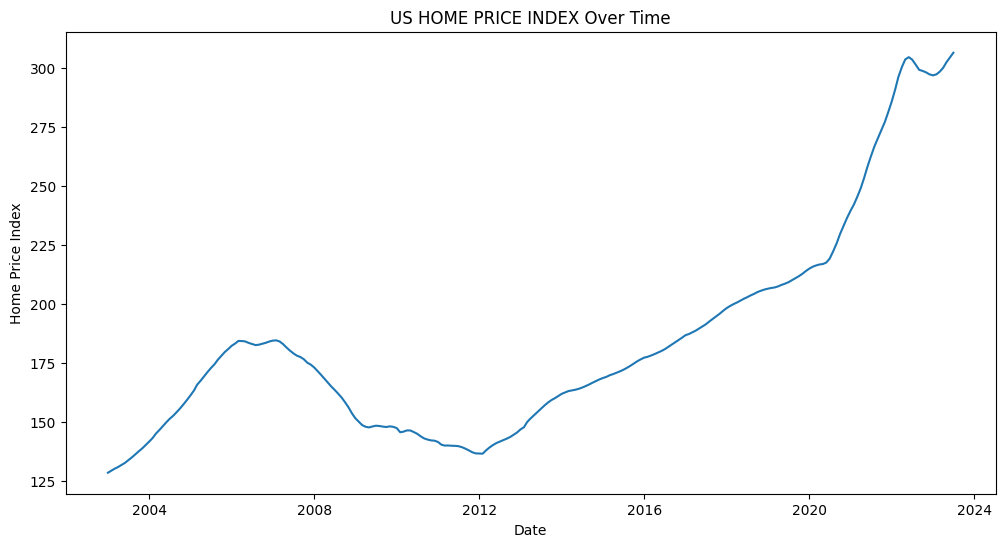

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data[target_column], label='US HOME PRICE INDEX')
plt.title('US HOME PRICE INDEX Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.show()

In [12]:
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

check_stationarity(data[target_column])

ADF Statistic: 0.4427326357381571
p-value: 0.9830245421451717
The series is non-stationary.


ADF Statistic: -2.0988337182850145
p-value: 0.24498382778778444
The series is non-stationary.


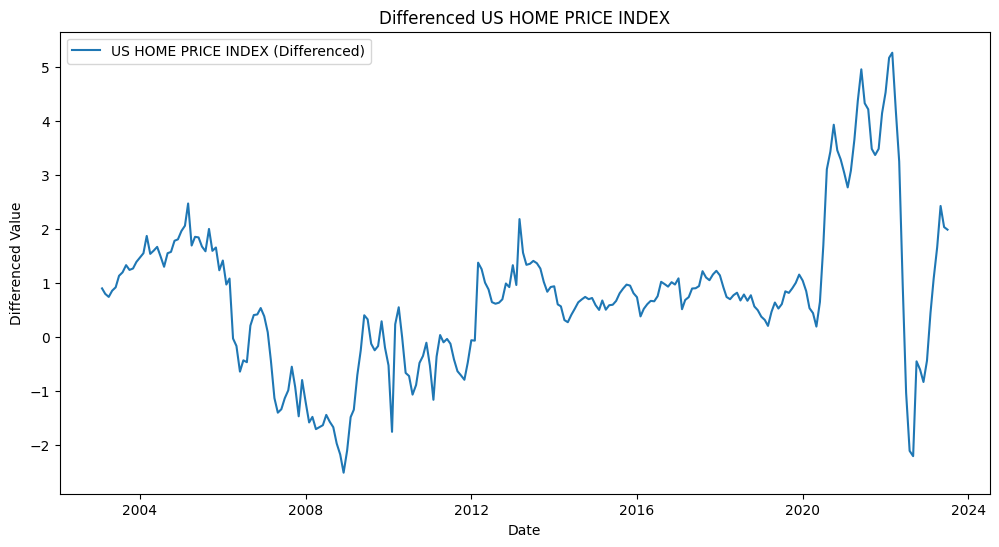

In [13]:
if adfuller(data[target_column])[1] > 0.05:
    data[f'{target_column} Diff'] = data[target_column].diff()
    check_stationarity(data[f'{target_column} Diff'].dropna())

plt.figure(figsize=(12, 6))
plt.plot(data[f'{target_column} Diff'], label=f'{target_column} (Differenced)')
plt.title('Differenced US HOME PRICE INDEX')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

In [14]:
train_size = int(len(data) * 0.8)
train, test = data[target_column][:train_size], data[target_column][train_size:]
auto_arima_model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
print(auto_arima_model.summary())


order = auto_arima_model.order  
arima_model = ARIMA(train, order=order)
arima_result = arima_model.fit()
forecast = arima_result.forecast(steps=len(test))


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.69 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=149.731, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=150.719, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=150.716, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=147.734, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=146.157, Time=0.95 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=154.719, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=148.101, Time=1.52 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=152.700, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=152.714, Time=0.28 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=144.162, Time=0.61 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=148.719, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=148.722, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=146.112, Time=0.55 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=146.106, 

C:\Users\Sanjoy\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sanjoy\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sanjoy\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


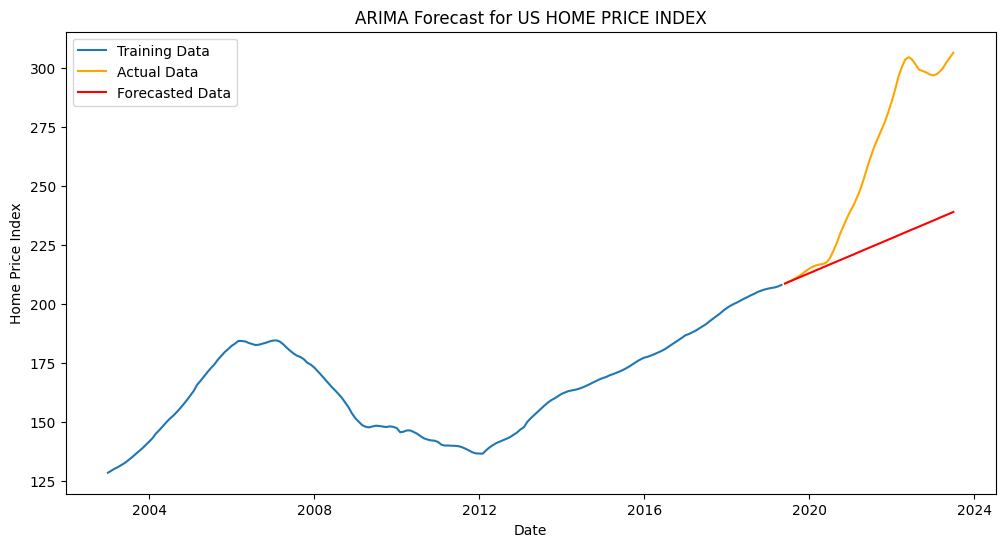

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test.index, forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Forecast for US HOME PRICE INDEX')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.show()

In [16]:
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 35.150060739631115
MSE: 2016.9067611743521
RMSE: 44.90998509434569


In [17]:
data_diff = data.diff().dropna()

var_model = VAR(data_diff)
var_result = var_model.fit(5)  # Choose appropriate lag order 

forecast_steps = 10 
forecast = var_result.forecast(data_diff.values[-5:], steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=data_diff.columns)


C:\Users\Sanjoy\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


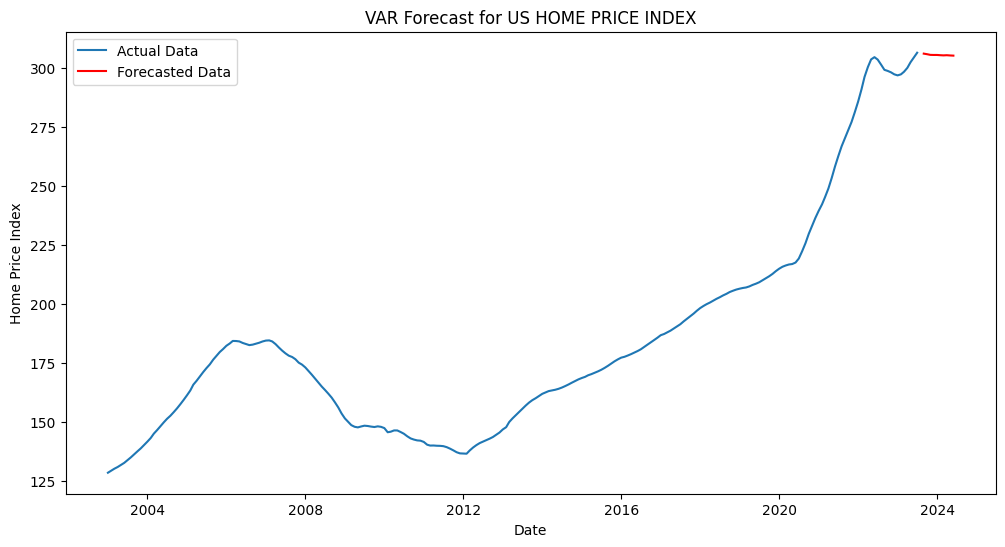

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data[target_column], label='Actual Data')
plt.plot(forecast_df.index, forecast_df[f'{target_column} Diff'].cumsum() + data[target_column].iloc[-1], label='Forecasted Data', color='red')
plt.title('VAR Forecast for US HOME PRICE INDEX')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.show()


In [184]:
merged_df_1 = pd.read_excel(r"C:\Users\Sanjoy\Desktop\US Home Price Influnces\Merged Data\merged_df_1.xlsx")

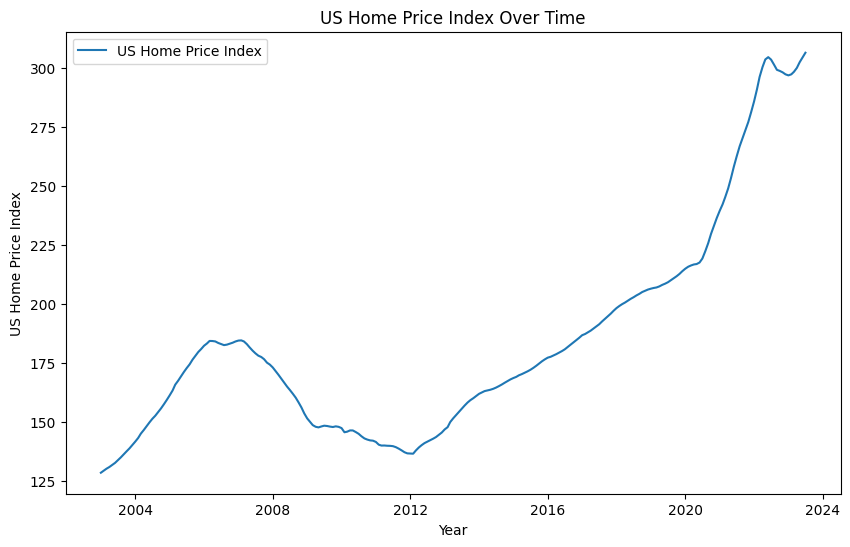

In [185]:
merged_df_1['DATE'] = pd.to_datetime(merged_df_1['DATE'])
merged_df_1.set_index('DATE', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(merged_df_1['US HOME PRICE INDEX'], label='US Home Price Index')
plt.title('US Home Price Index Over Time')
plt.xlabel('Year')
plt.ylabel('US Home Price Index')
plt.legend()
plt.show()


In [7]:
result = adfuller(merged_df_1['US HOME PRICE INDEX'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.4427326357381571
p-value: 0.9830245421451717
